In [52]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "mental-health-dataset"

# **Import**

In [53]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & EDA**

In [54]:
df <- read.csv('/kaggle/input/mental-health-dataset/mental_health_dataset.csv')

In [55]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
User_ID,1,1000,500.5000,288.8194361,500.5,500.500000,370.6500,1,1000,999,0.000000000,-1.203601,9.13327251
Age,2,1000,41.8920,13.9747497,42.0,41.897500,17.7912,18,65,47,0.005149943,-1.240129,0.44192039
Gender*,3,1000,2.4290,1.1037106,2.0,2.411250,1.4826,1,4,3,0.059367260,-1.329913,0.03490240
Occupation*,4,1000,4.0200,1.9853316,4.0,4.025000,2.9652,1,7,6,-0.017668918,-1.256434,0.06278170
Country*,5,1000,3.9520,2.0430051,4.0,3.940000,2.9652,1,7,6,0.042985412,-1.279525,0.06460549
Mental_Health_Condition*,6,1000,1.5150,0.5000250,2.0,1.518750,0.0000,1,2,1,-0.059937000,-1.998403,0.01581218
Severity*,7,1000,3.0070,1.1464141,4.0,3.133750,0.0000,1,4,3,-0.646829062,-1.119658,0.03625280
Consultation_History*,8,1000,1.4950,0.5002252,1.0,1.493750,0.0000,1,2,1,0.019971006,-2.001600,0.01581851
Stress_Level*,9,1000,1.9780,0.8137433,2.0,1.972500,1.4826,1,3,2,0.040217097,-1.490271,0.02573282


In [56]:
summary(df)

    User_ID            Age           Gender           Occupation       
 Min.   :   1.0   Min.   :18.00   Length:1000        Length:1000       
 1st Qu.: 250.8   1st Qu.:30.00   Class :character   Class :character  
 Median : 500.5   Median :42.00   Mode  :character   Mode  :character  
 Mean   : 500.5   Mean   :41.89                                        
 3rd Qu.: 750.2   3rd Qu.:54.00                                        
 Max.   :1000.0   Max.   :65.00                                        
   Country          Mental_Health_Condition   Severity        
 Length:1000        Length:1000             Length:1000       
 Class :character   Class :character        Class :character  
 Mode  :character   Mode  :character        Mode  :character  
                                                              
                                                              
                                                              
 Consultation_History Stress_Level        Sleep_Hours  

**Check missing value**

In [57]:
colSums(is.na(df))

User_ID                     Age                  Gender 
                      0                       0                       0 
             Occupation                 Country Mental_Health_Condition 
                      0                       0                       0 
               Severity    Consultation_History            Stress_Level 
                      0                       0                       0 
            Sleep_Hours              Work_Hours Physical_Activity_Hours 
                      0                       0                       0

**Duplicate check**

In [58]:
sum(duplicated(df))

[1] 0

In [59]:
head(df)

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
1,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
2,2,34,Female,Education,UK,Yes,None,No,Low,7.5,47,8
3,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
4,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
5,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5
6,6,64,Non-binary,IT,UK,Yes,High,No,High,6.3,34,0


In [60]:
tail(df)

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
995,995,56,Non-binary,Finance,Canada,Yes,None,No,High,7.5,75,8
996,996,46,Non-binary,Other,Germany,No,None,Yes,Low,9.3,50,0
997,997,31,Male,Sales,Canada,No,None,No,High,4.5,37,6
998,998,33,Female,IT,Germany,No,High,Yes,Medium,9.7,73,10
999,999,42,Female,Finance,Australia,Yes,None,No,Medium,6.5,79,8
1000,1000,43,Prefer not to say,Sales,Germany,No,Low,Yes,Low,6.0,61,7


# **2. Data Transformation for Visualize**

In [61]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [62]:
num_cols <- num_cols[2:5]
num_cols

[1] "Age"                     "Sleep_Hours"            
[3] "Work_Hours"              "Physical_Activity_Hours"

In [63]:
for(i in 1:length(df)){
    if(is.character(df[,i]) == TRUE)
        df[,i] <- as.factor(df[,i])
}

In [64]:
summary(df)

    User_ID            Age                      Gender          Occupation 
 Min.   :   1.0   Min.   :18.00   Female           :270   Education  :135  
 1st Qu.: 250.8   1st Qu.:30.00   Male             :247   Engineering:148  
 Median : 500.5   Median :42.00   Non-binary       :267   Finance    :139  
 Mean   : 500.5   Mean   :41.89   Prefer not to say:216   Healthcare :149  
 3rd Qu.: 750.2   3rd Qu.:54.00                           IT         :133  
 Max.   :1000.0   Max.   :65.00                           Other      :161  
                                                          Sales      :135  
      Country    Mental_Health_Condition   Severity   Consultation_History
 Australia:160   No :485                 High  :159   No :505             
 Canada   :138   Yes:515                 Low   :176   Yes:495             
 Germany  :141                           Medium:164                       
 India    :155                           None  :501                       
 Other    :115   

# **3. Data Visualization**

## **Histogram & Boxplot**

In [65]:
options(repr.plot.width = 16.0, repr.plot.height = 12.0)

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


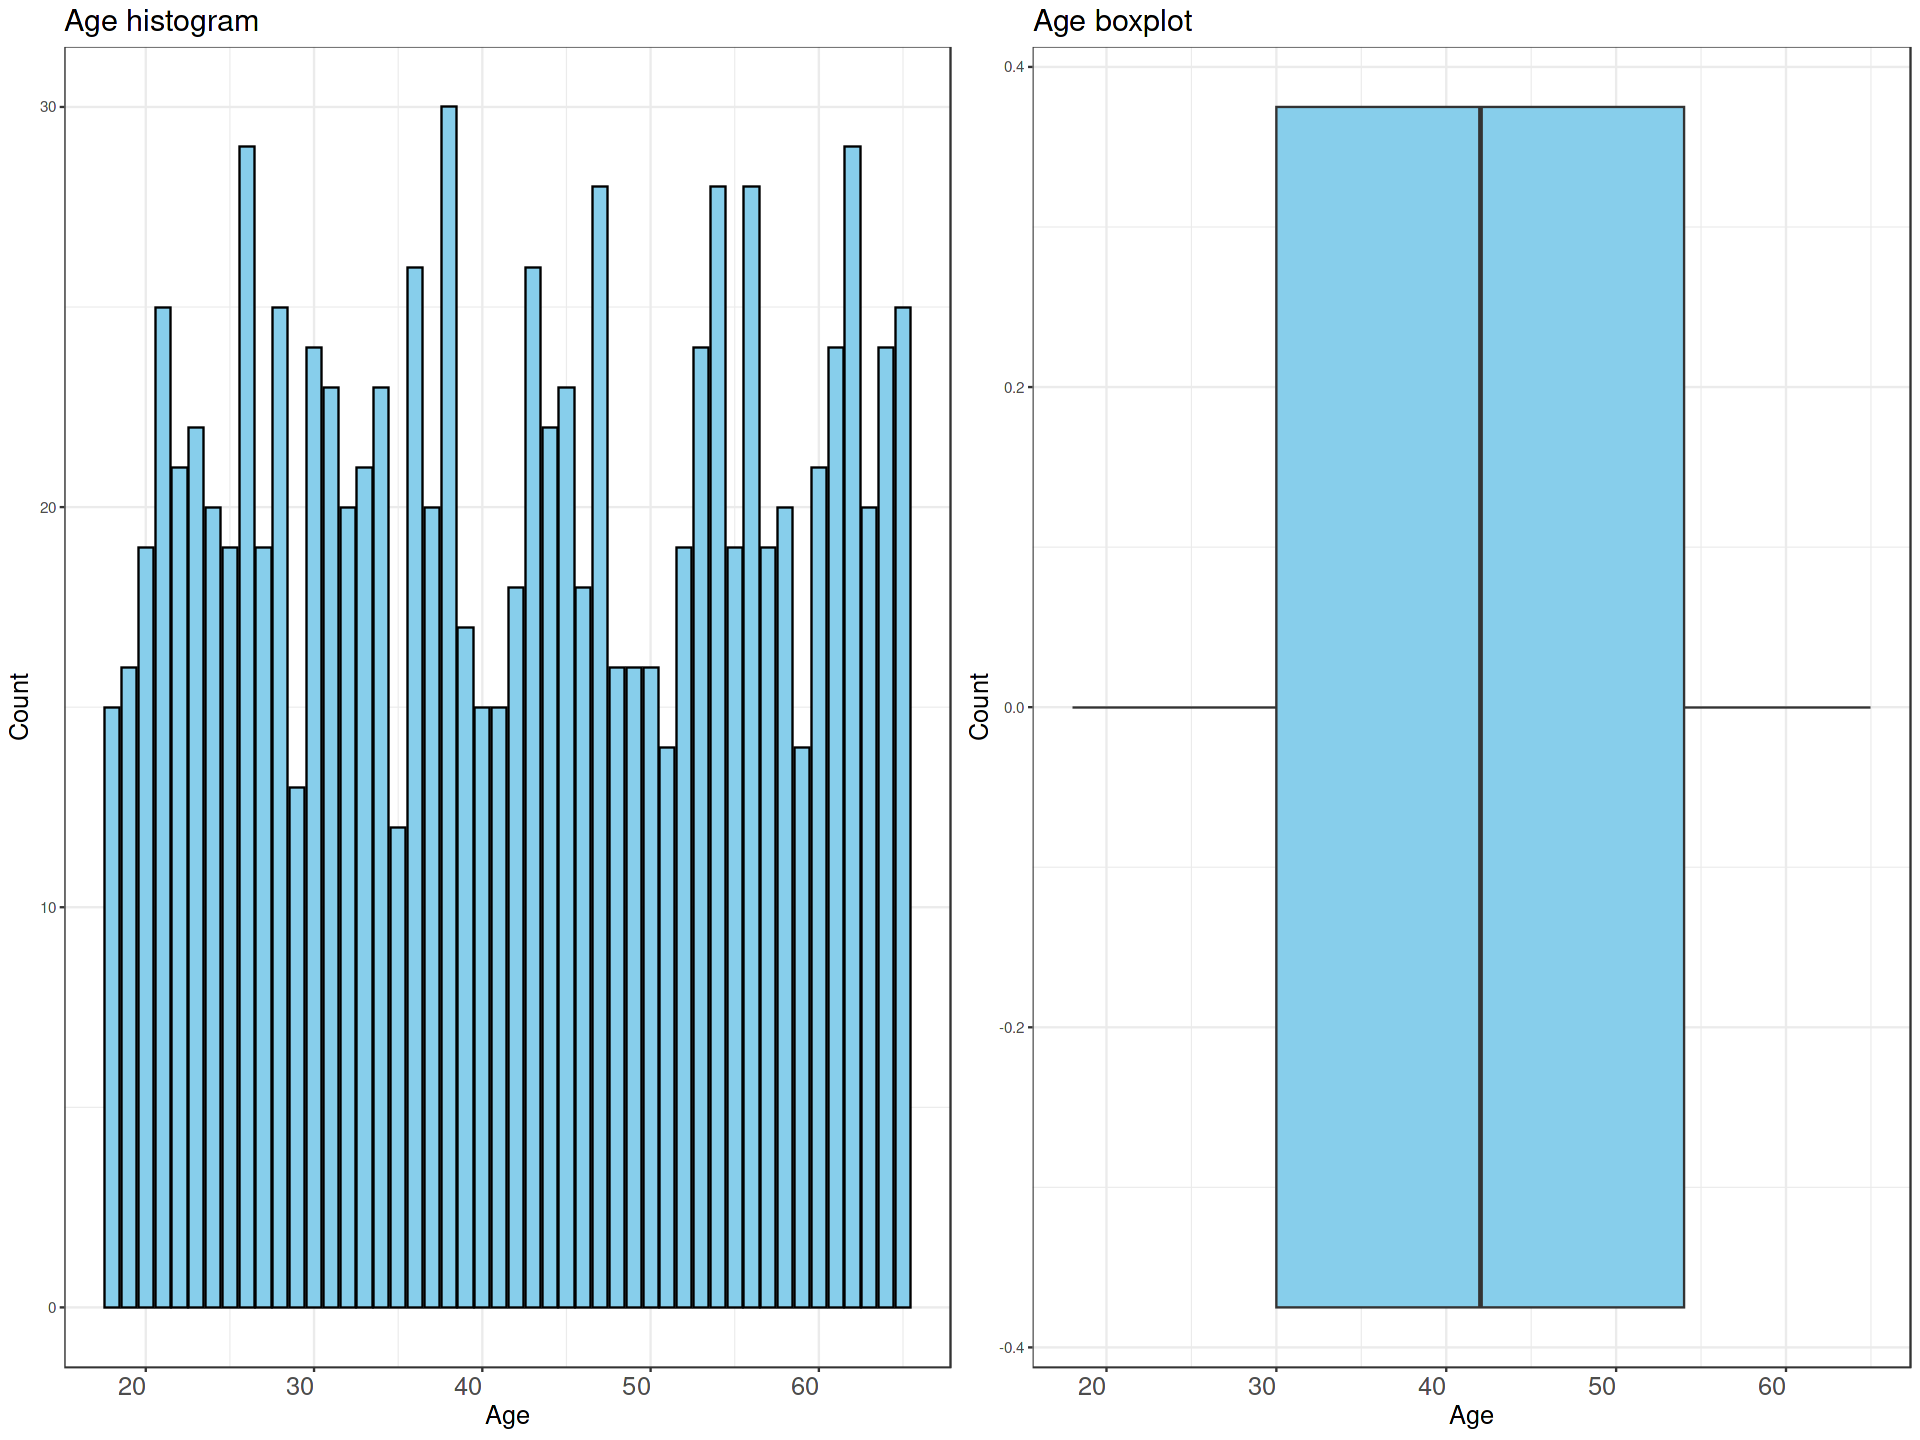

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


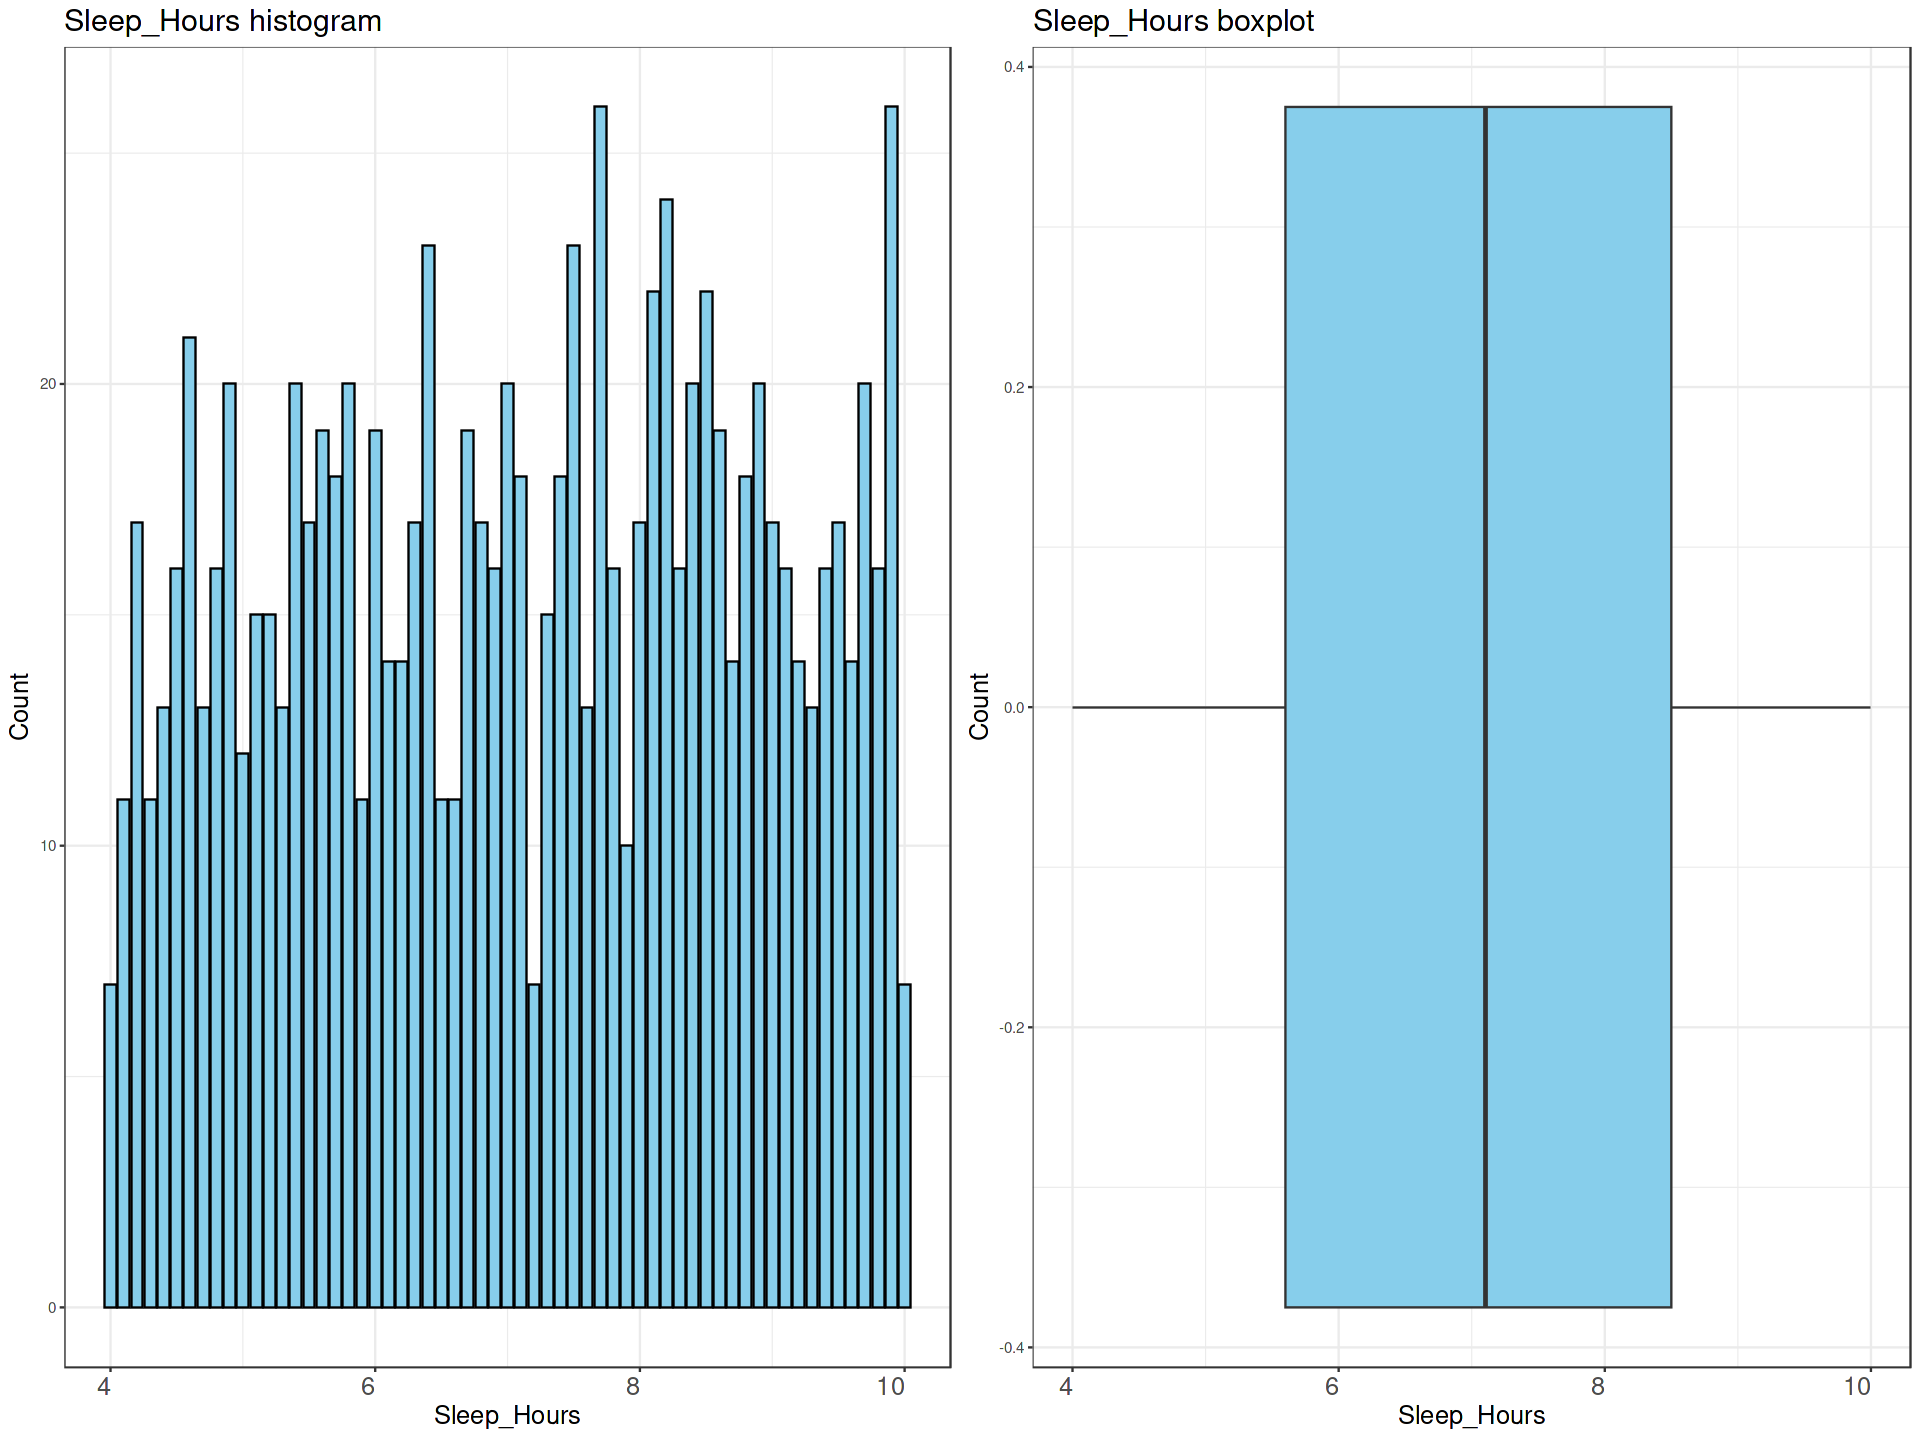

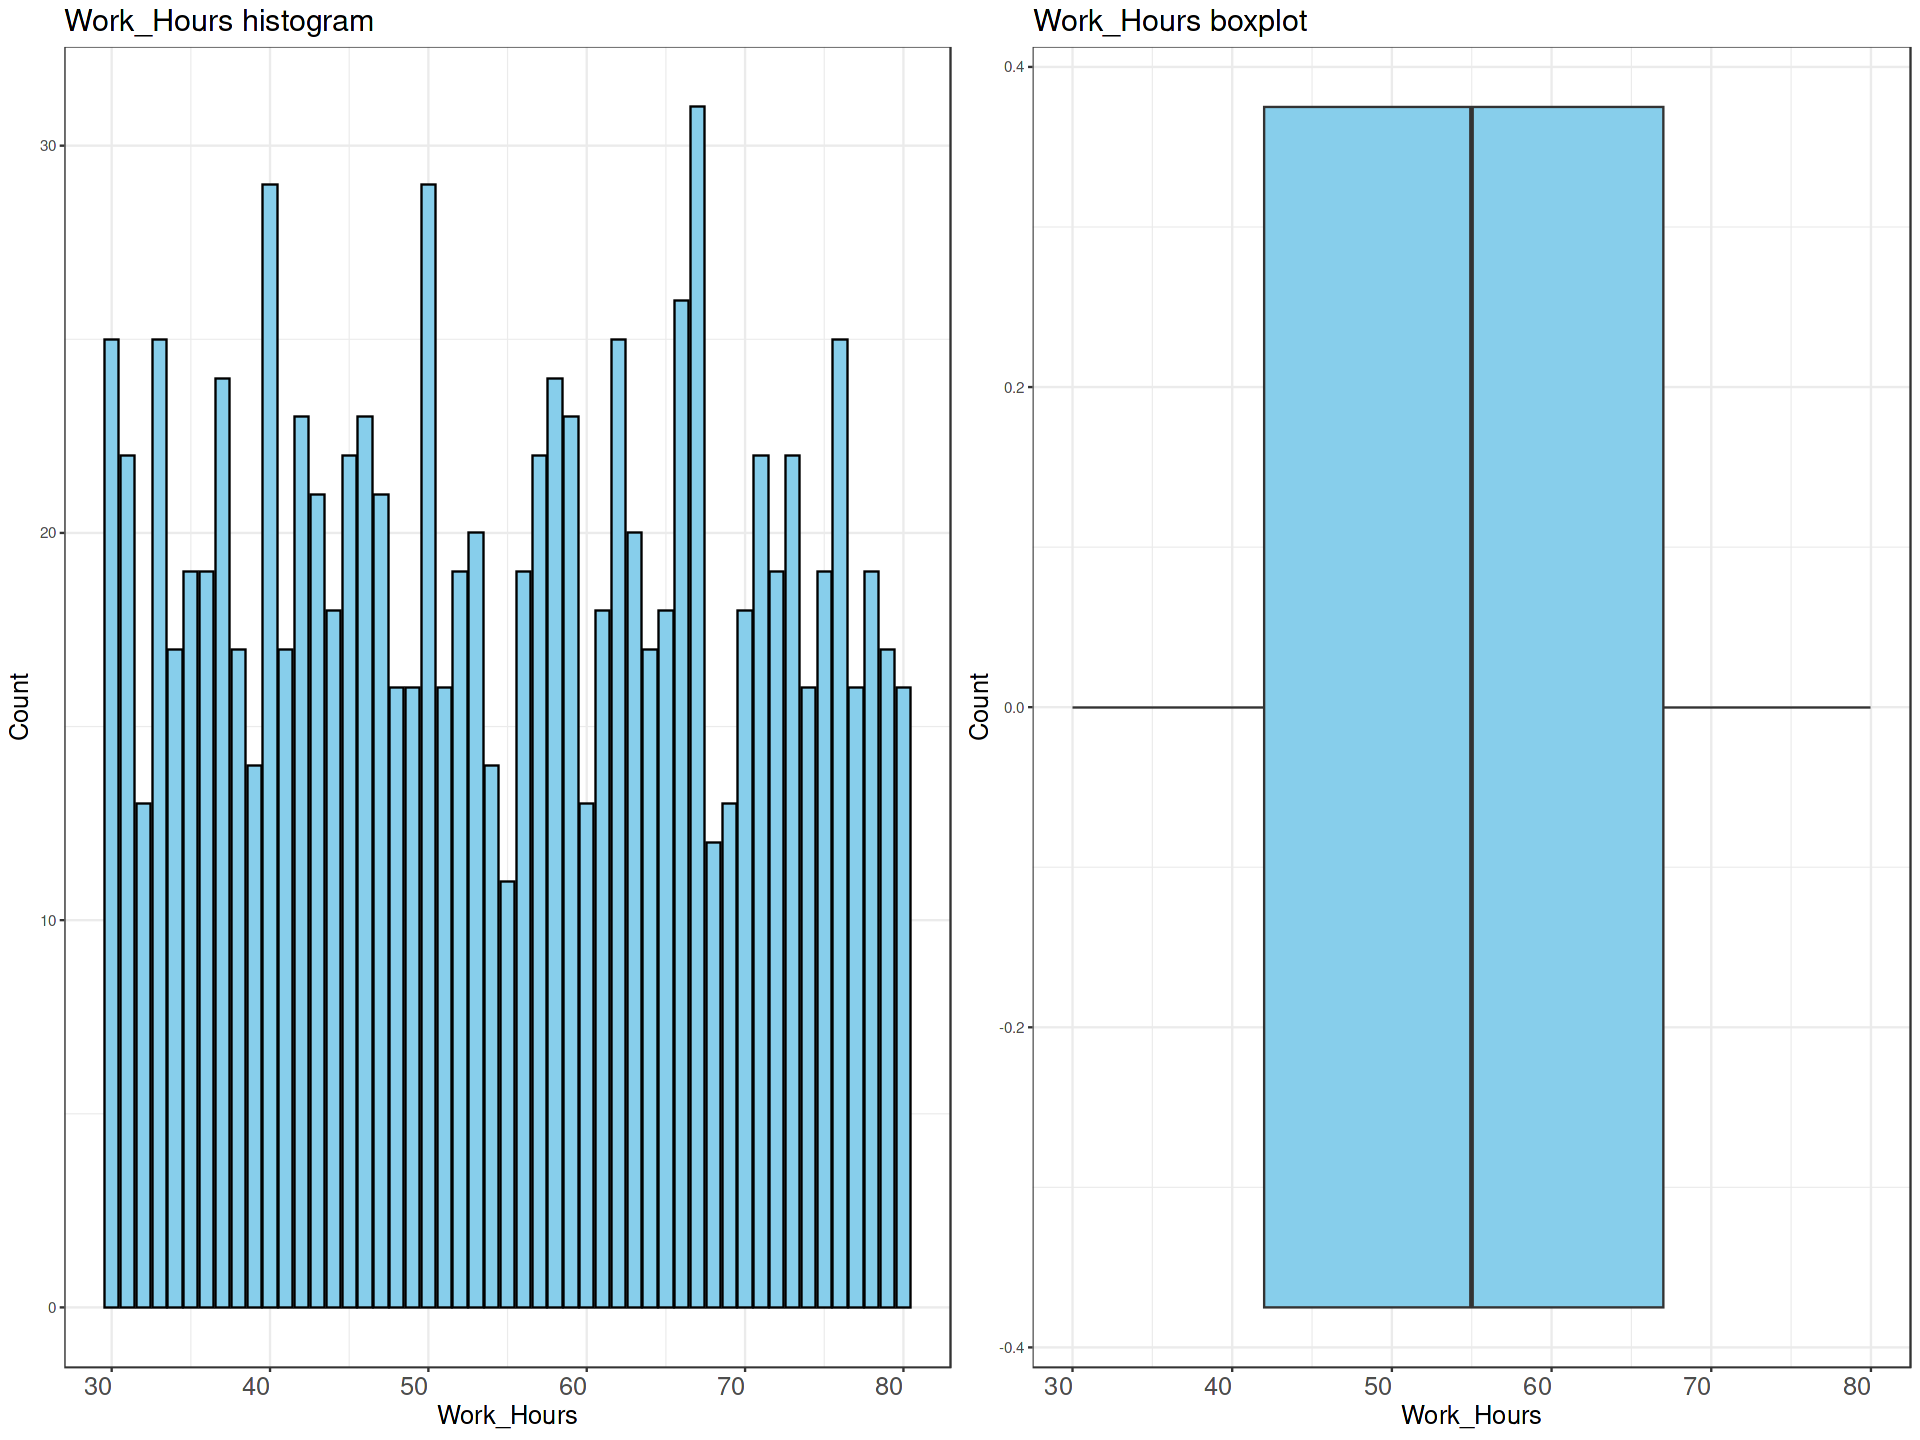

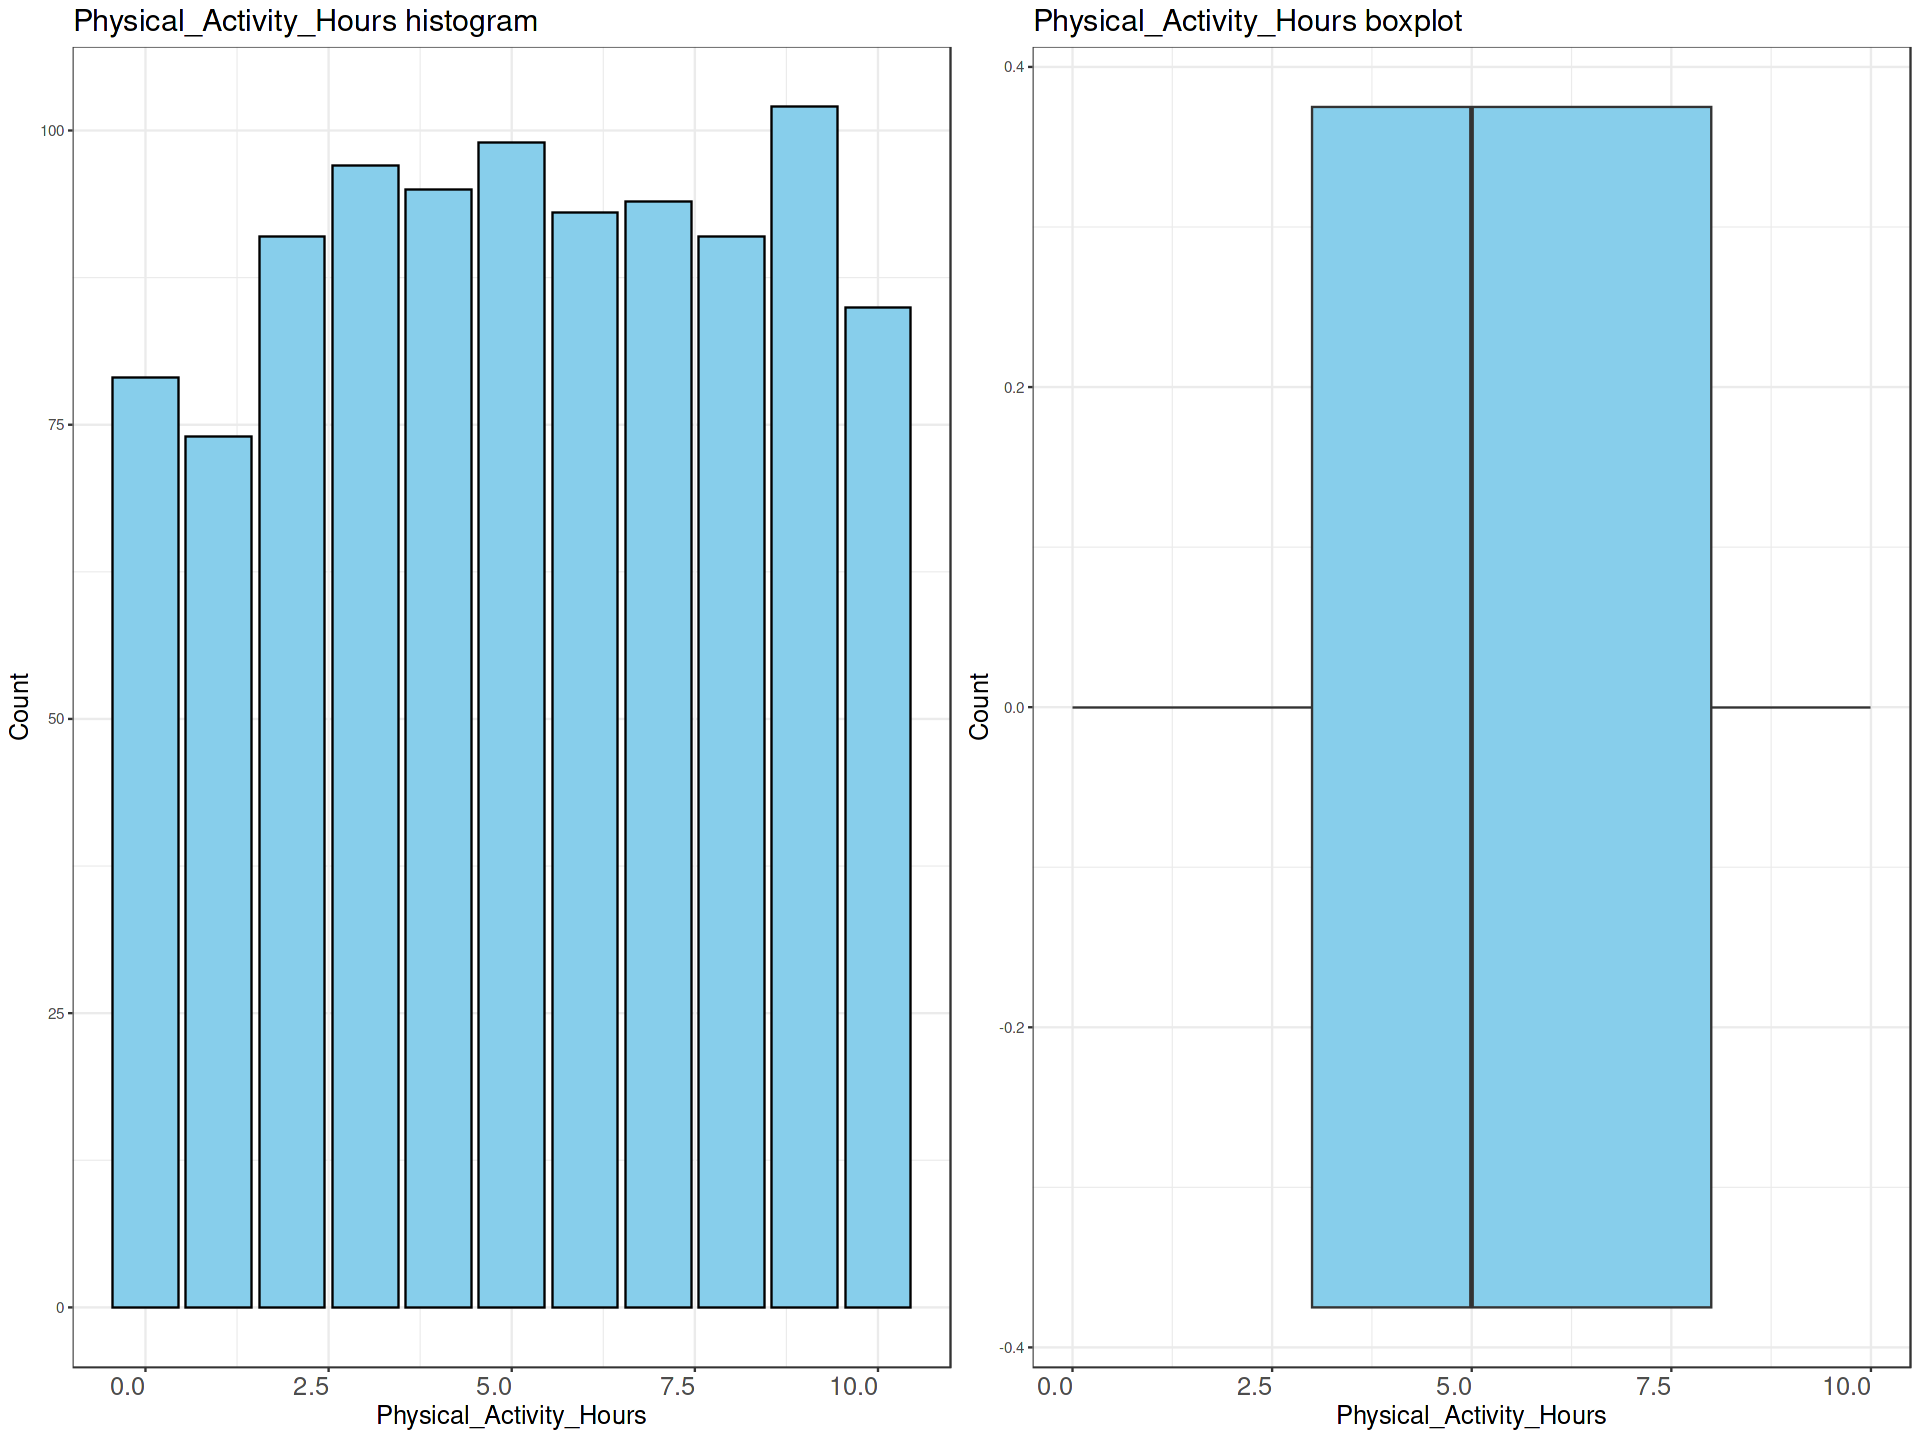

In [66]:
for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', stat="count") + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    grid.arrange(a,b , ncol = 2)    
}

## **Countplot**

In [67]:
cat_cols <- df %>% select(-num_cols, -User_ID)
cat_cols <- colnames(cat_cols)

In [68]:
cat_cols

[1] "Gender"                  "Occupation"             
[3] "Country"                 "Mental_Health_Condition"
[5] "Severity"                "Consultation_History"   
[7] "Stress_Level"

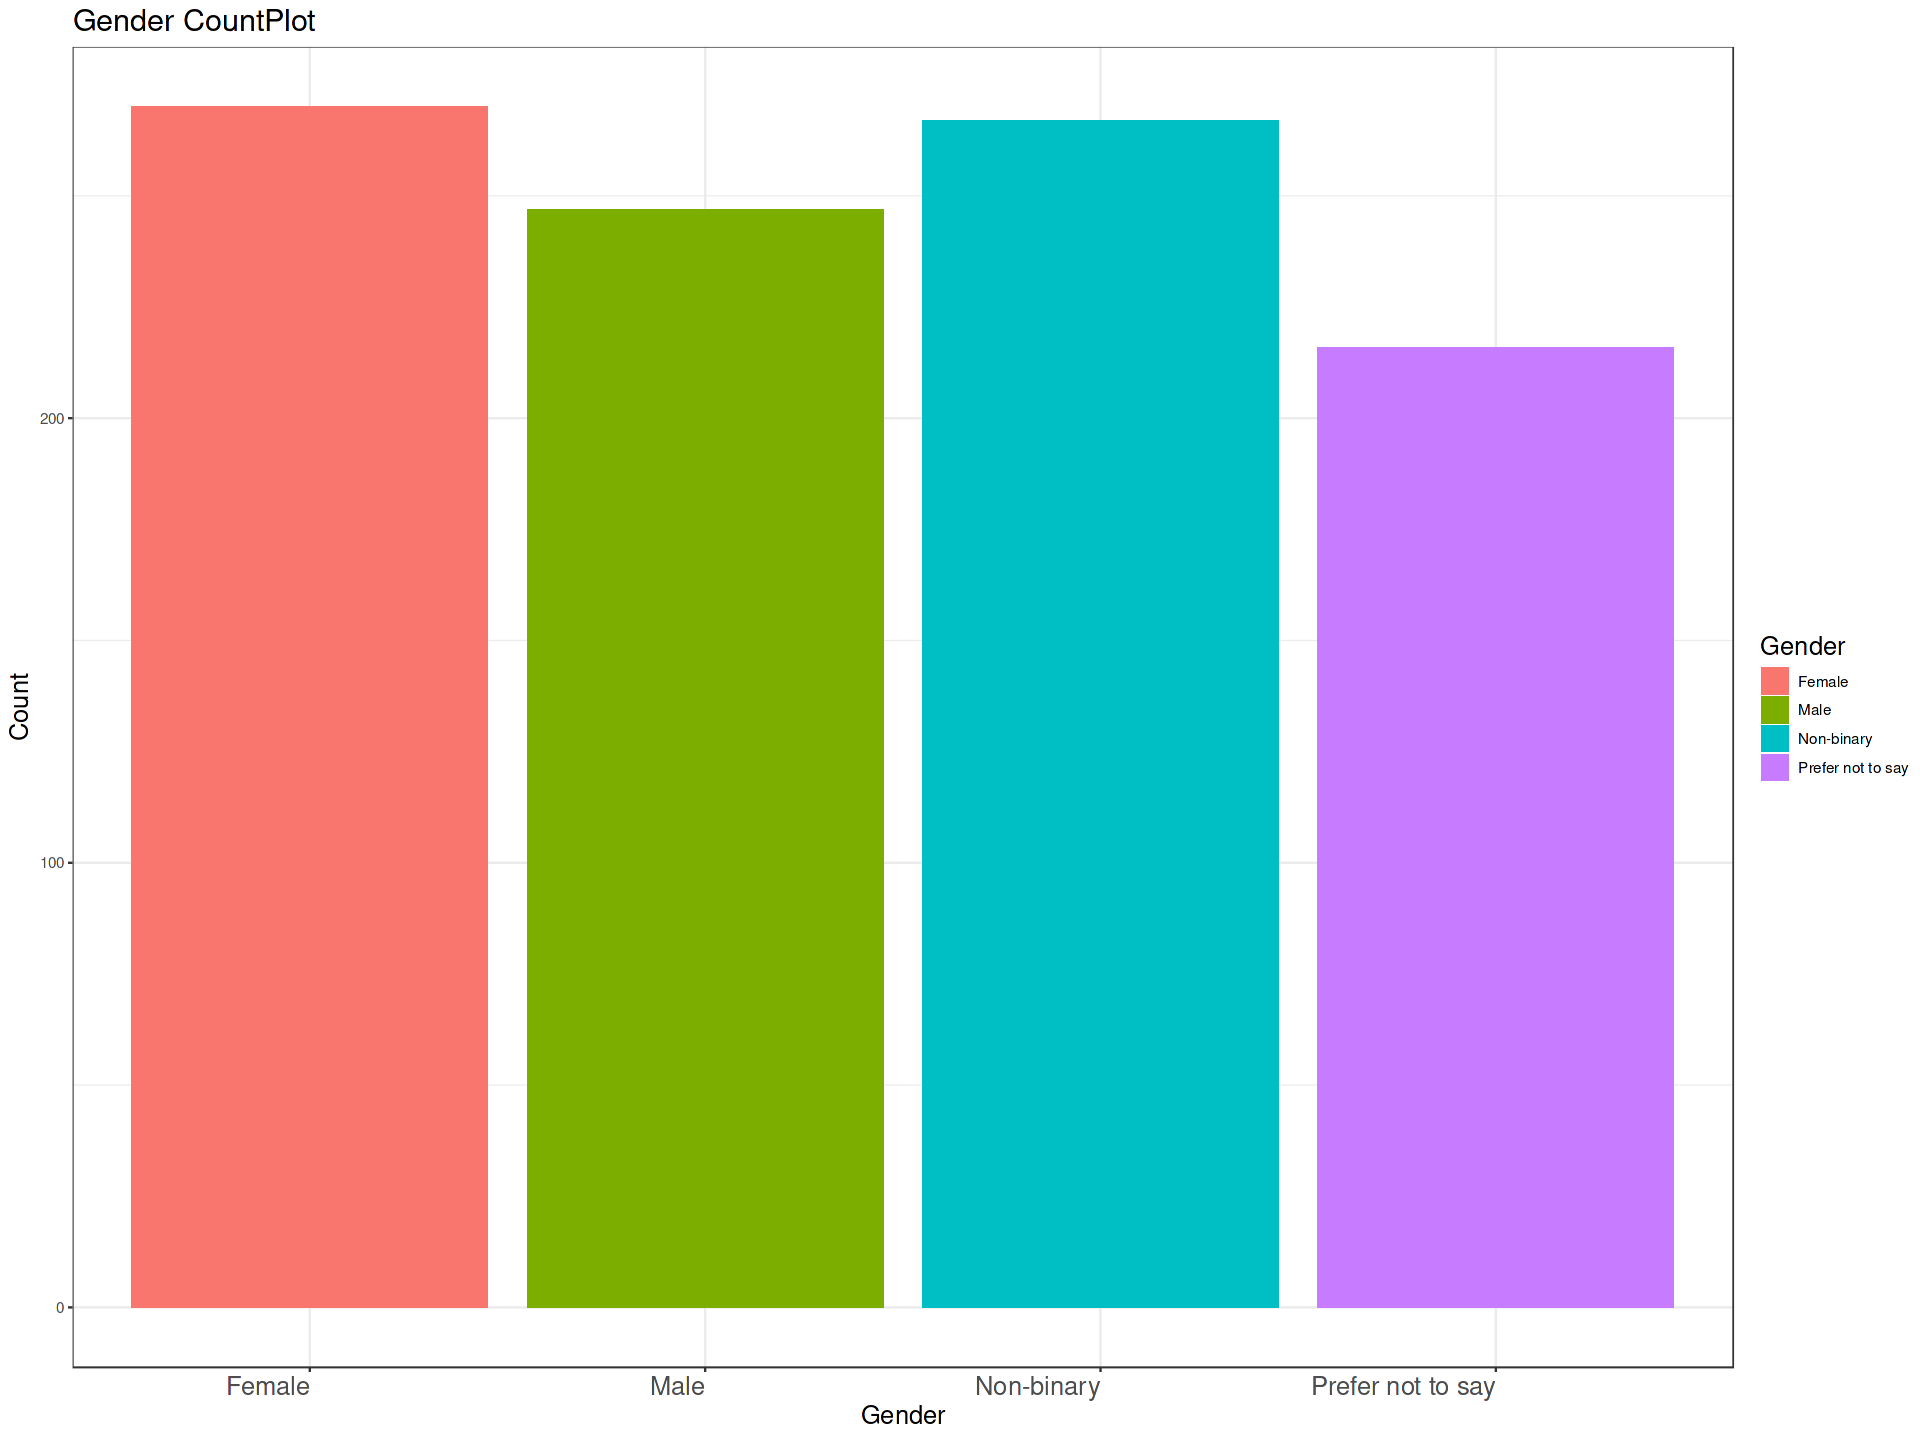

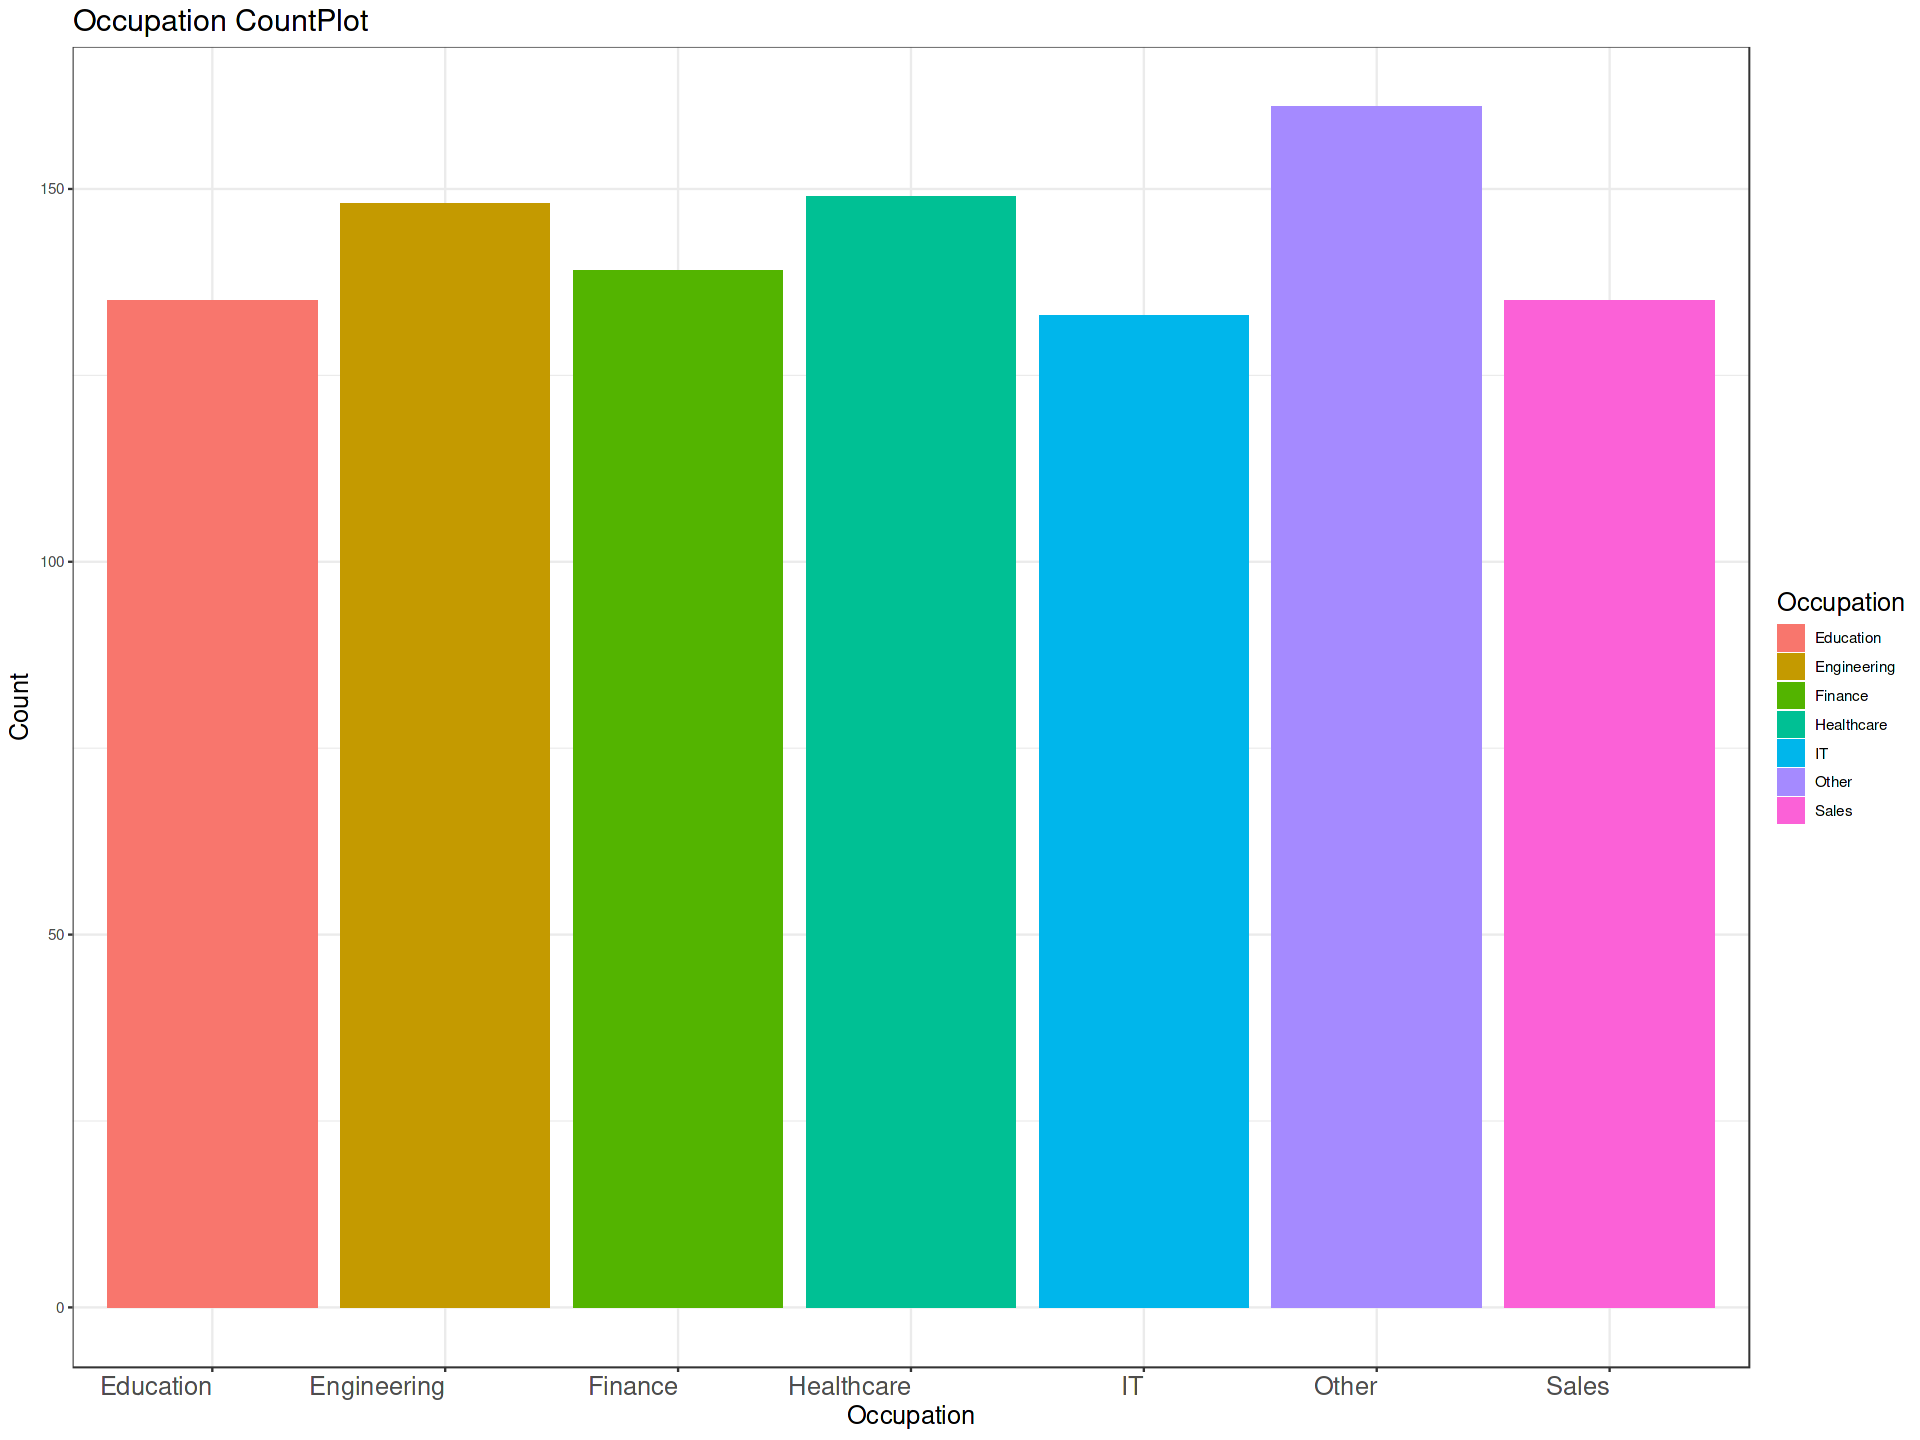

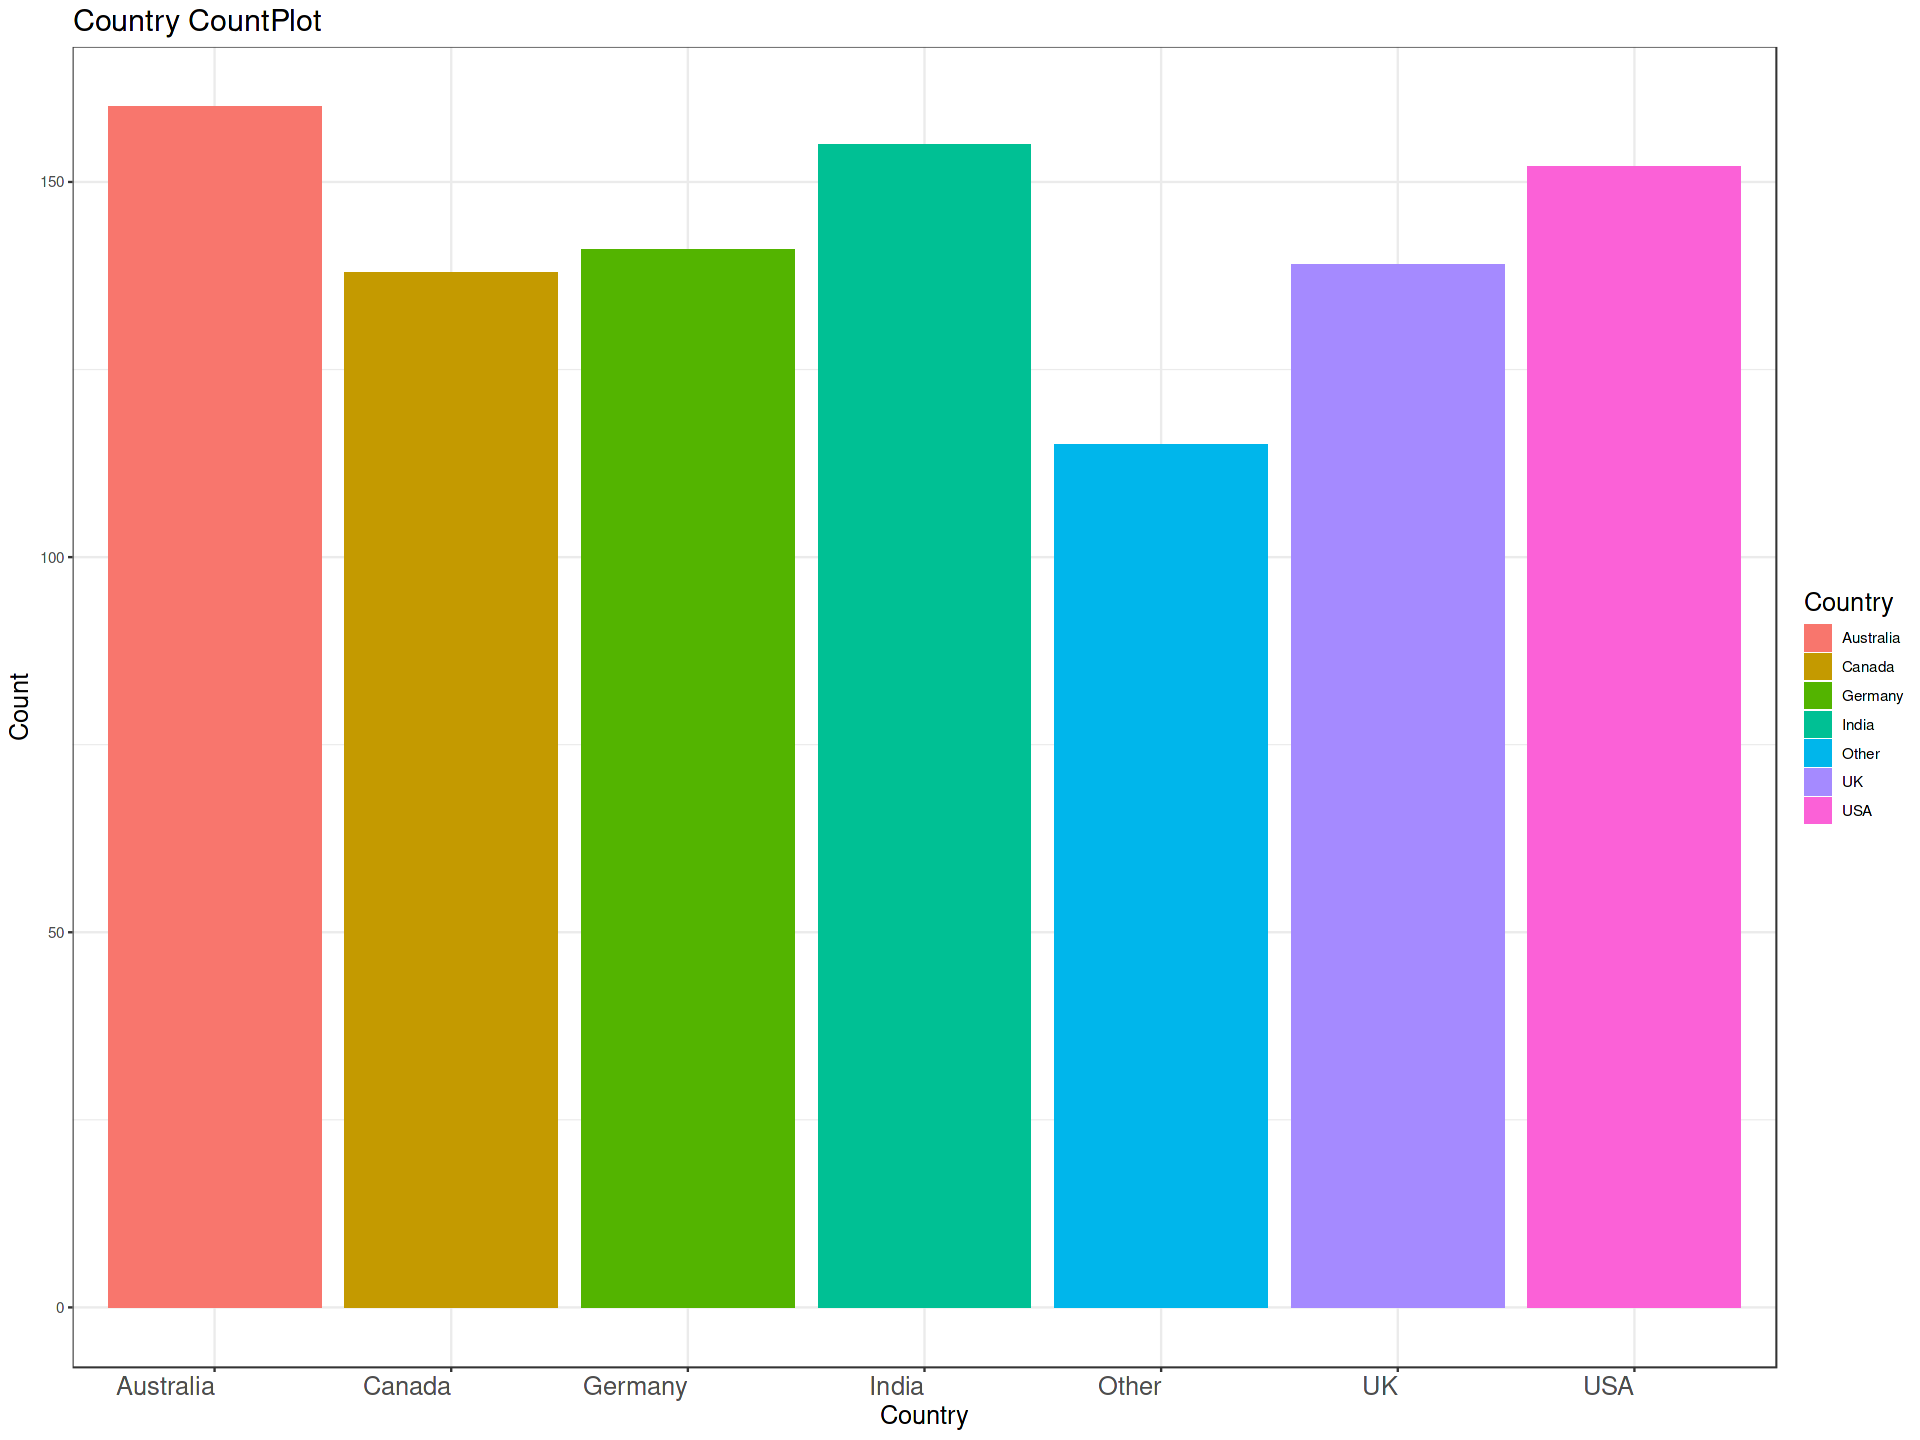

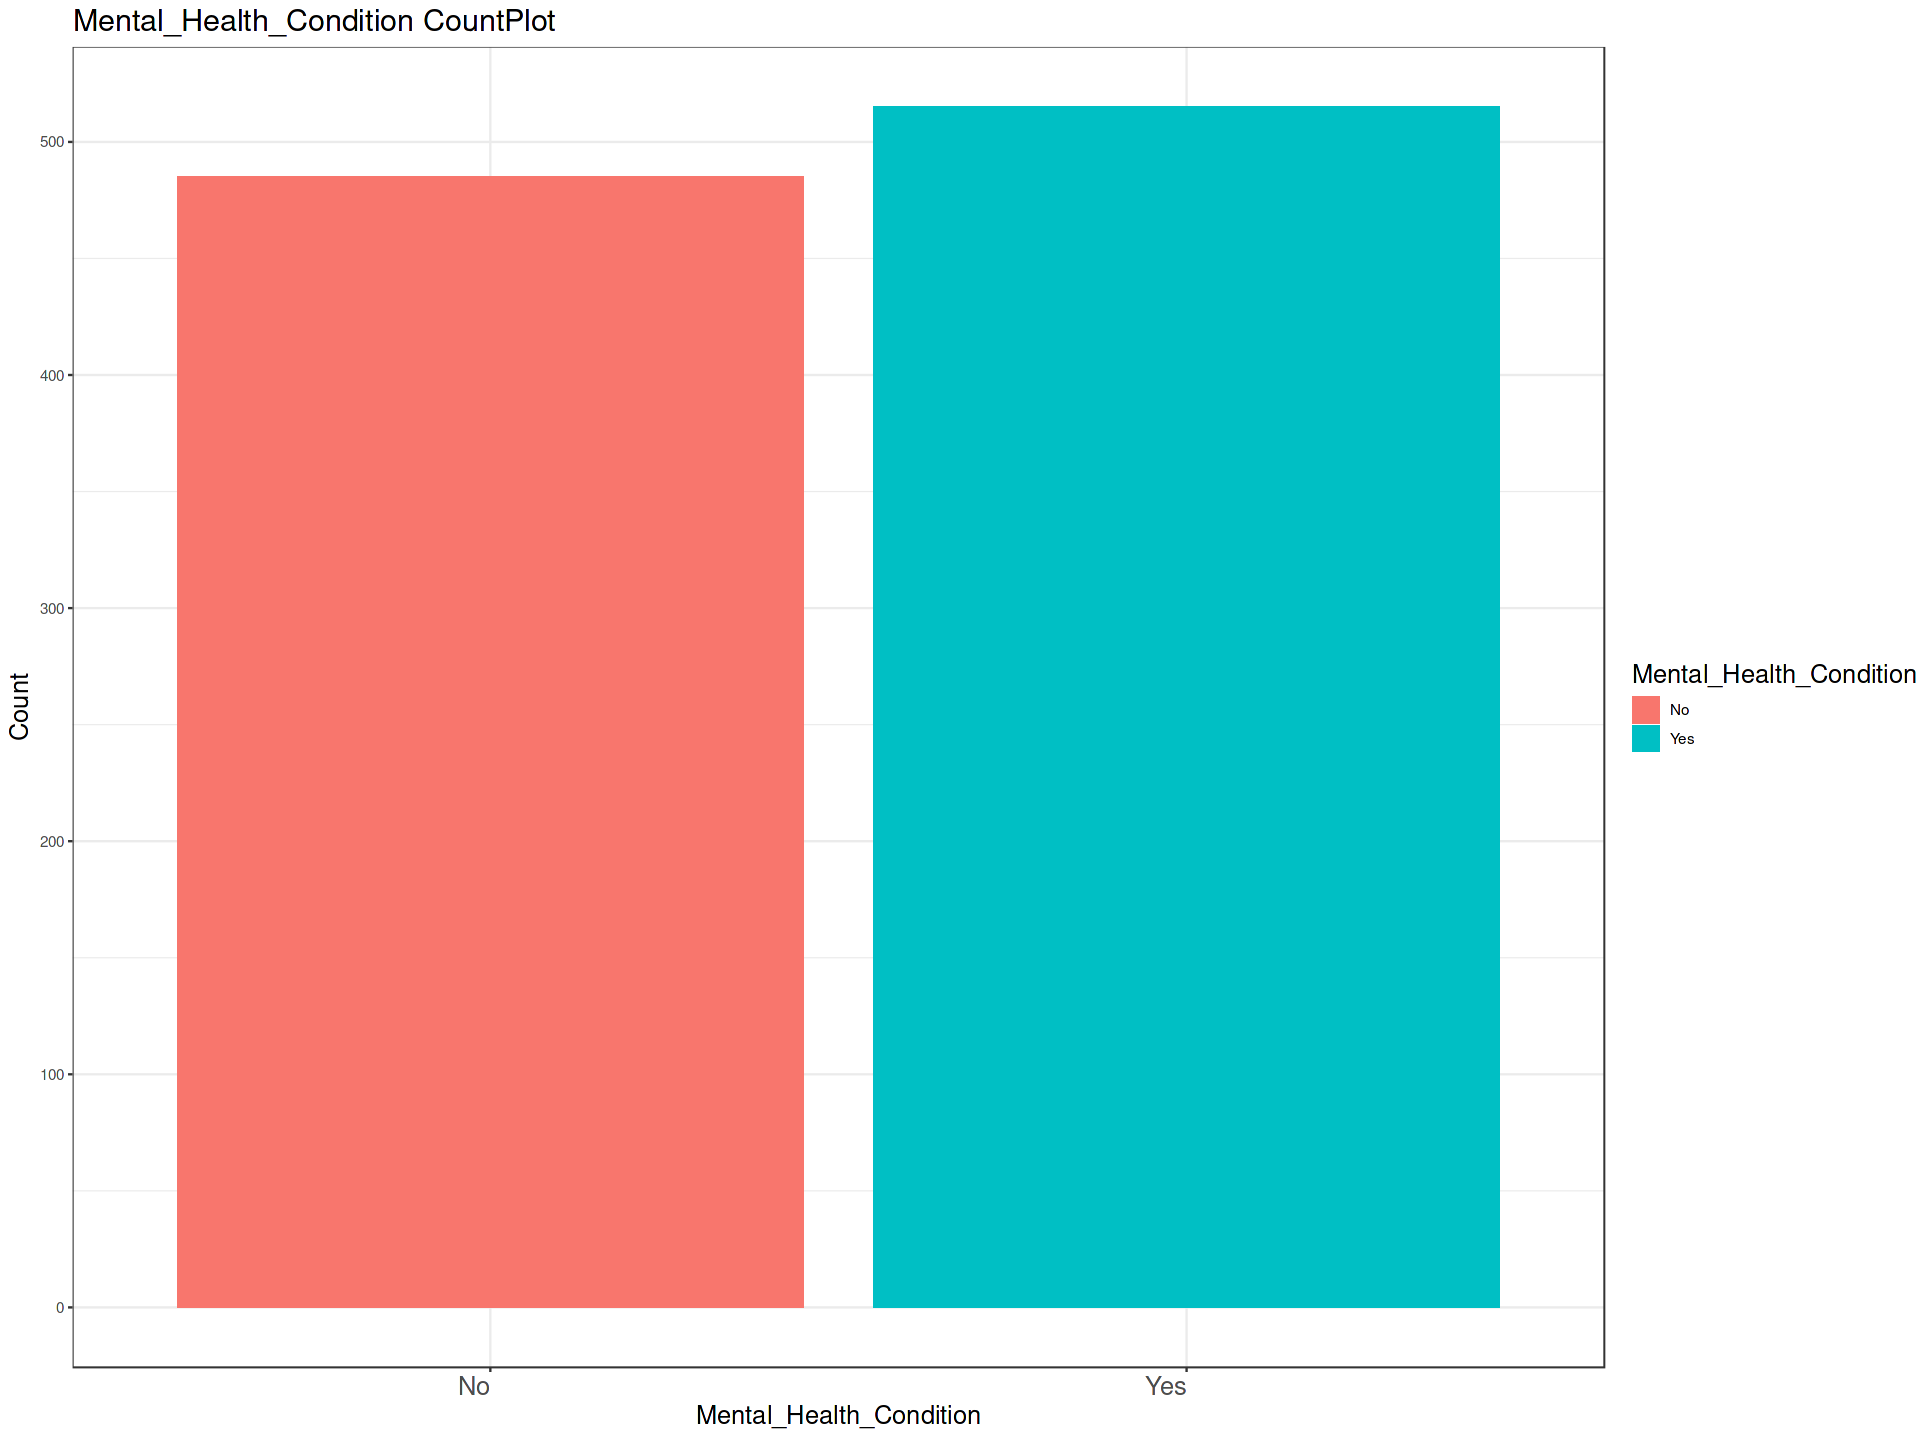

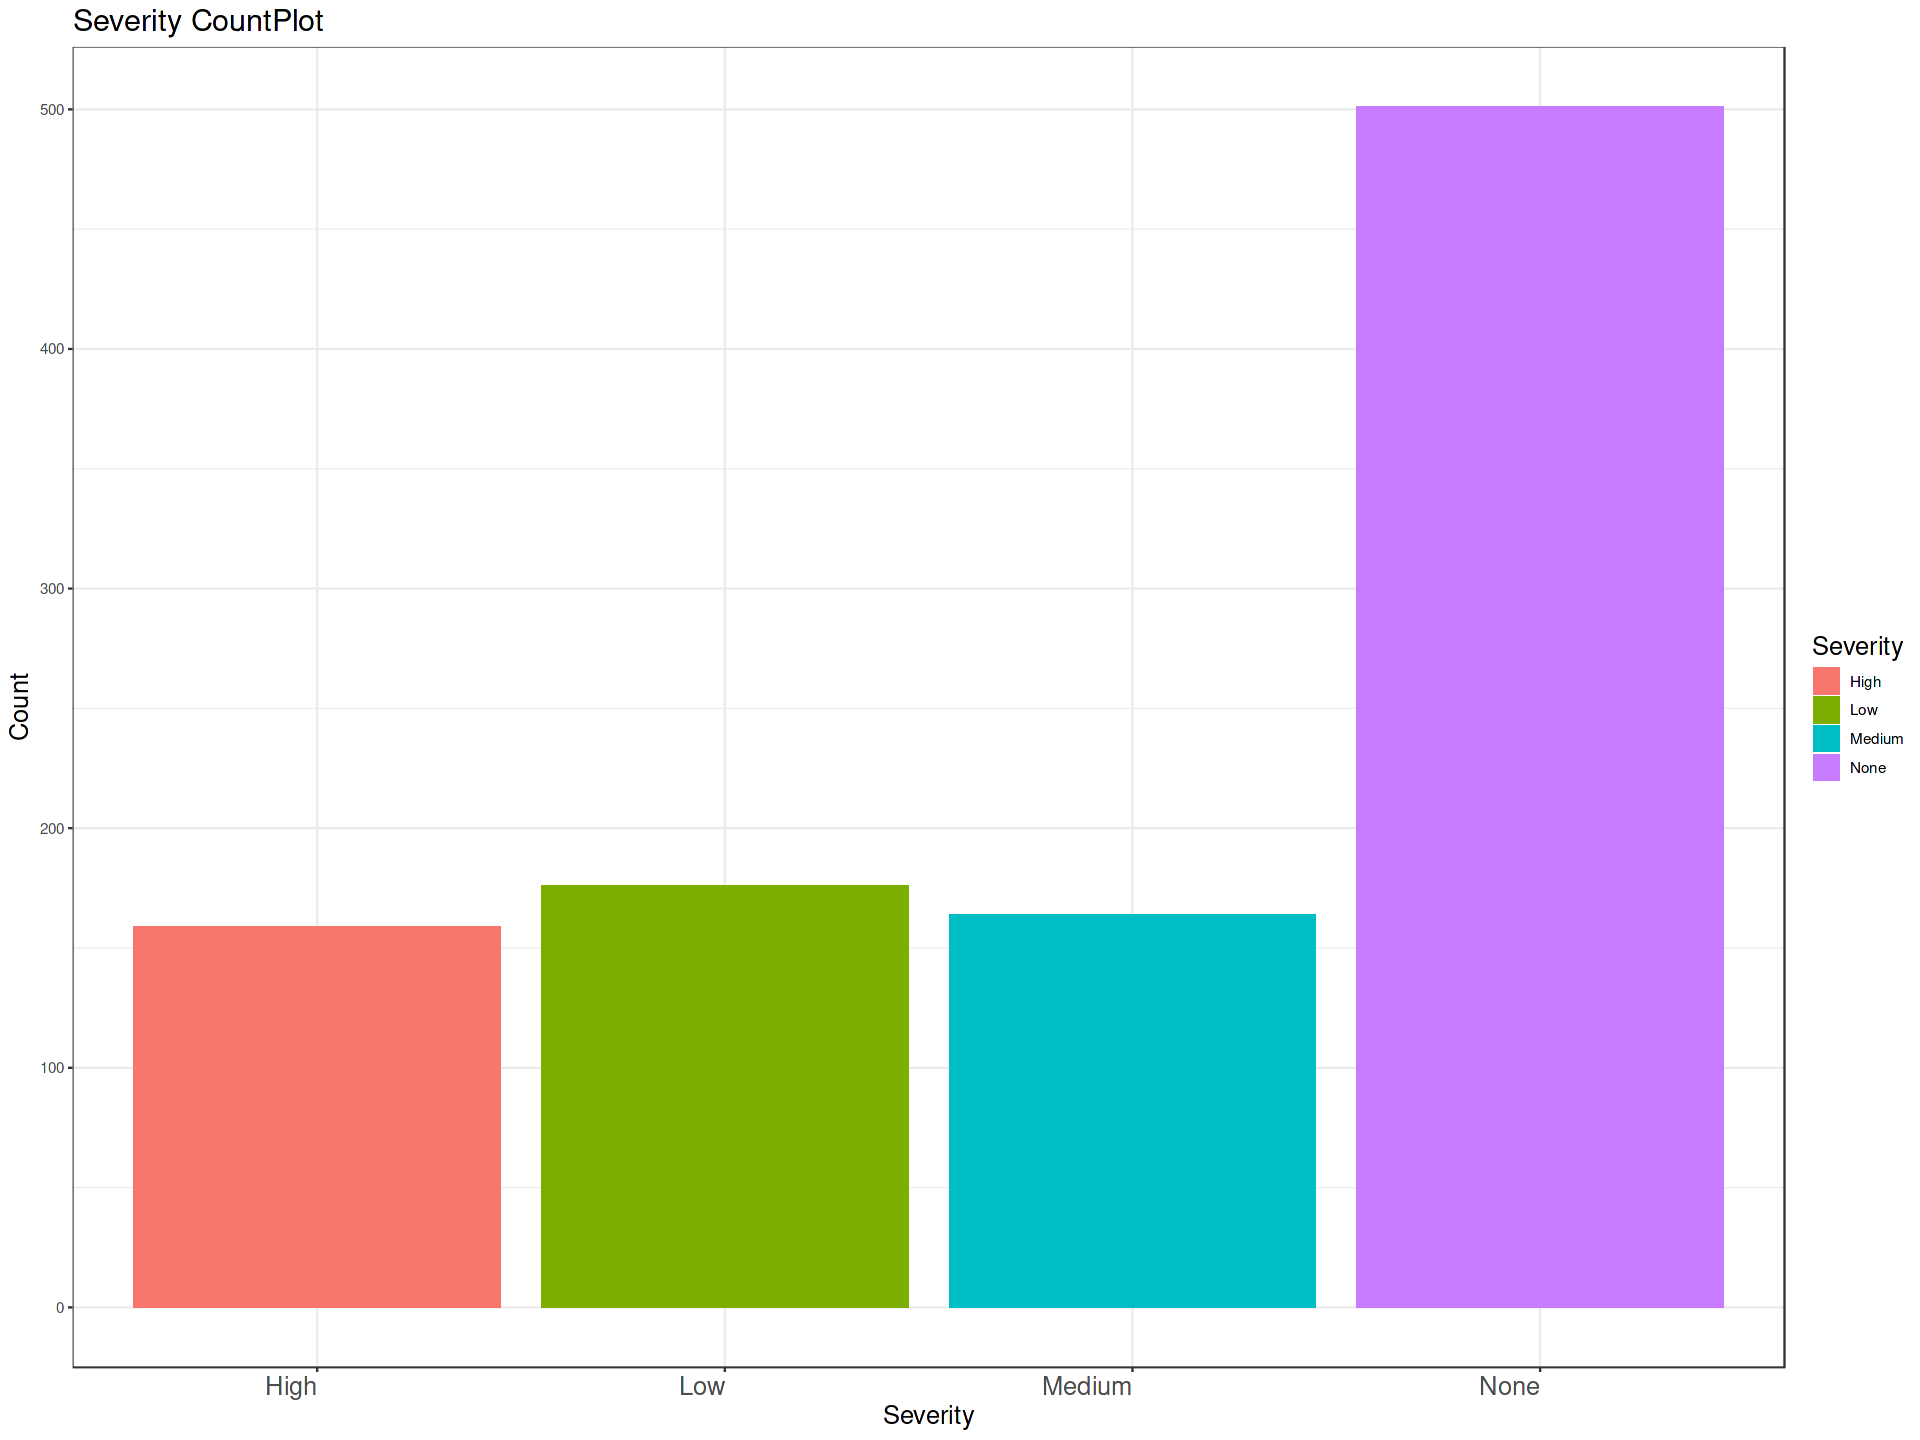

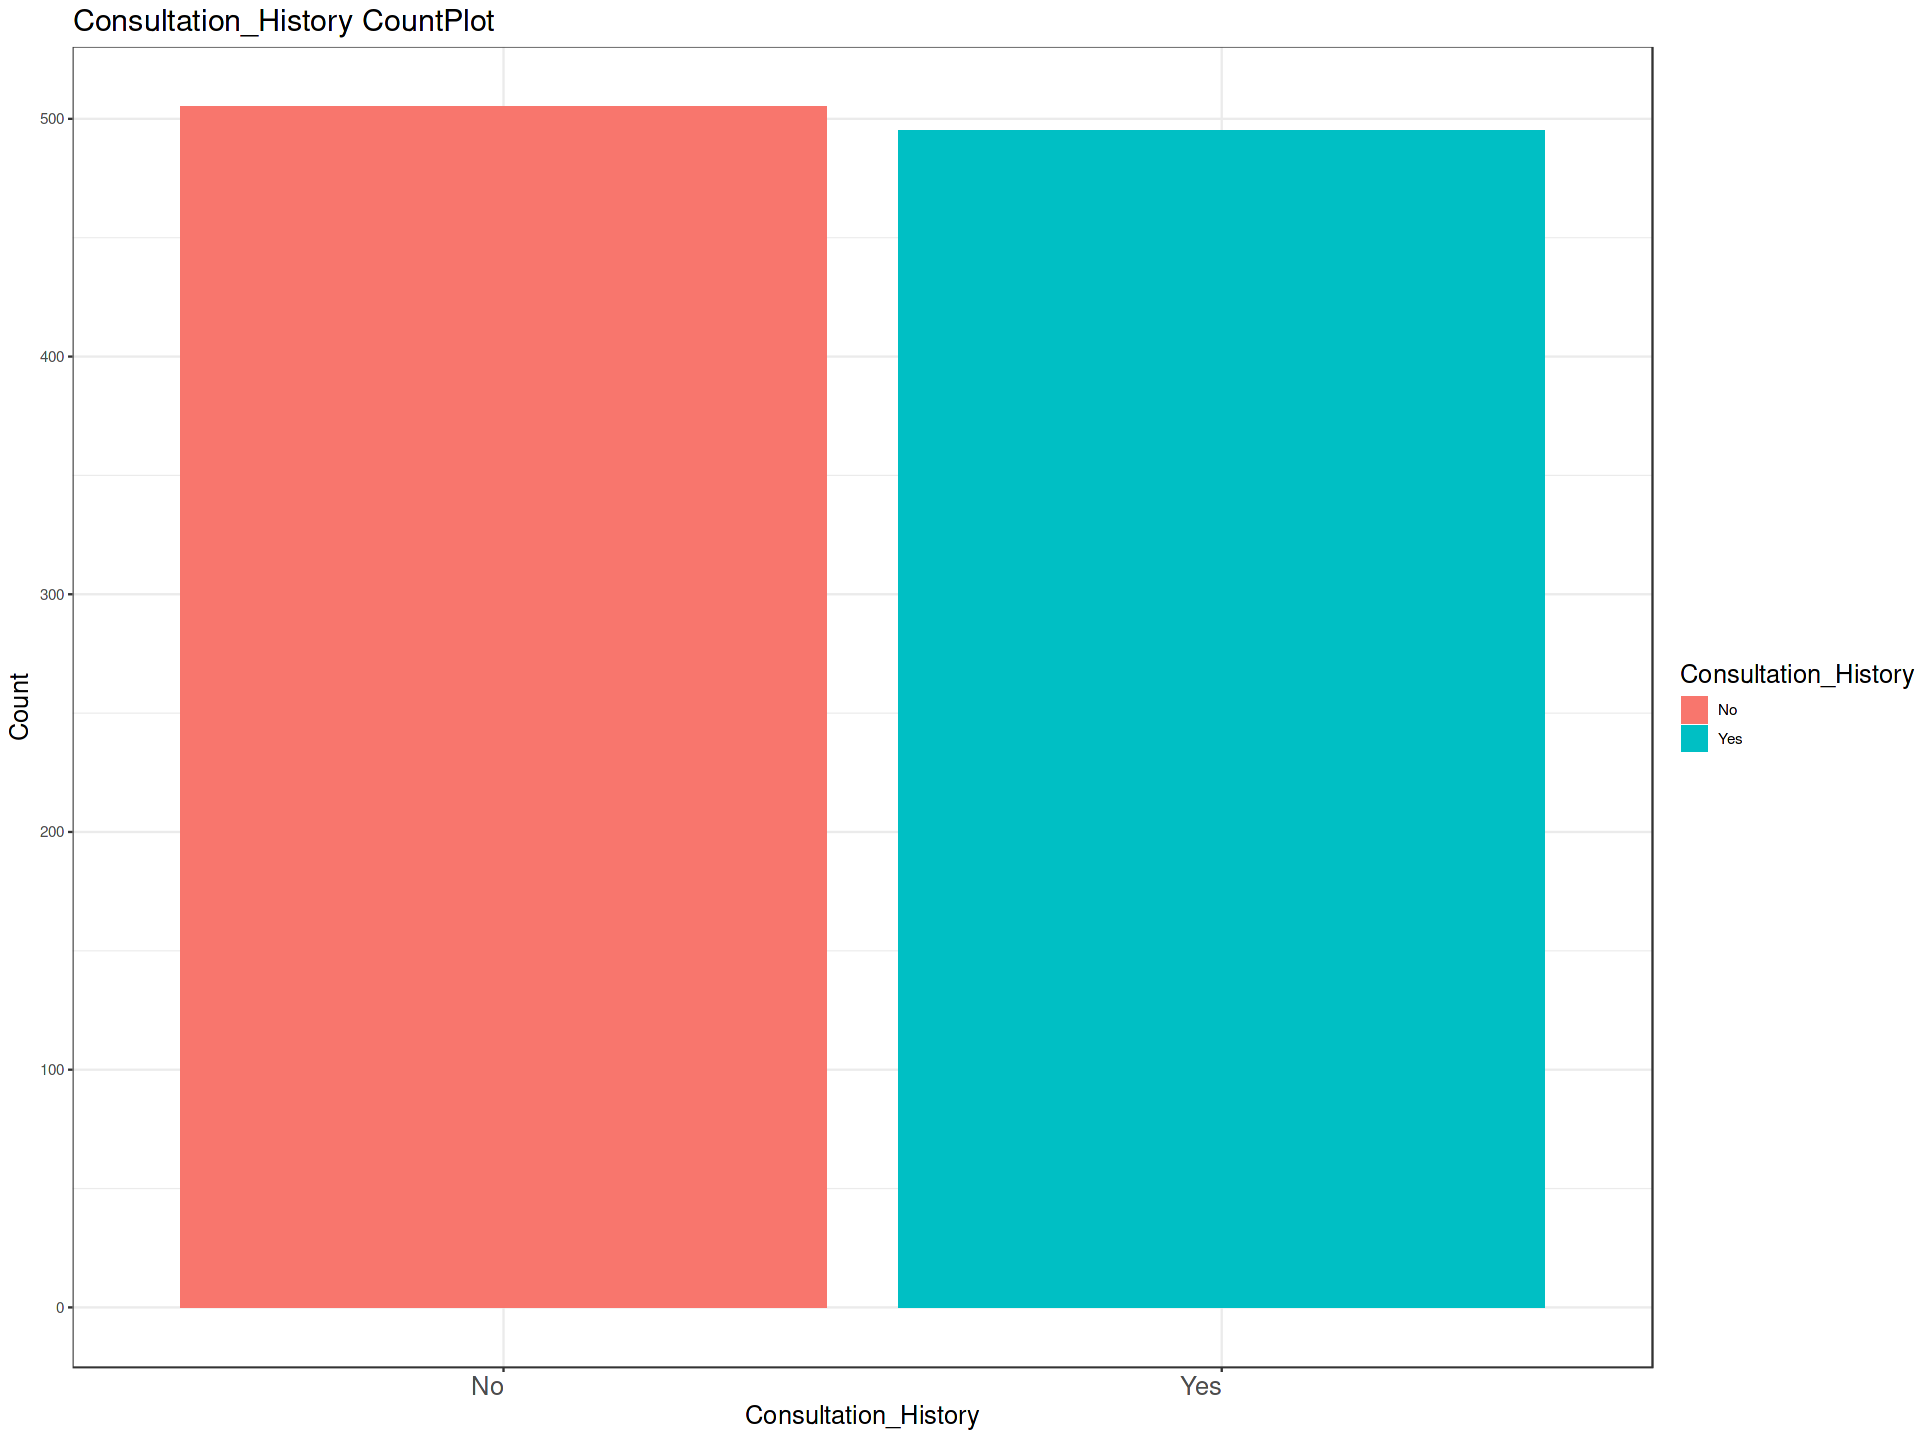

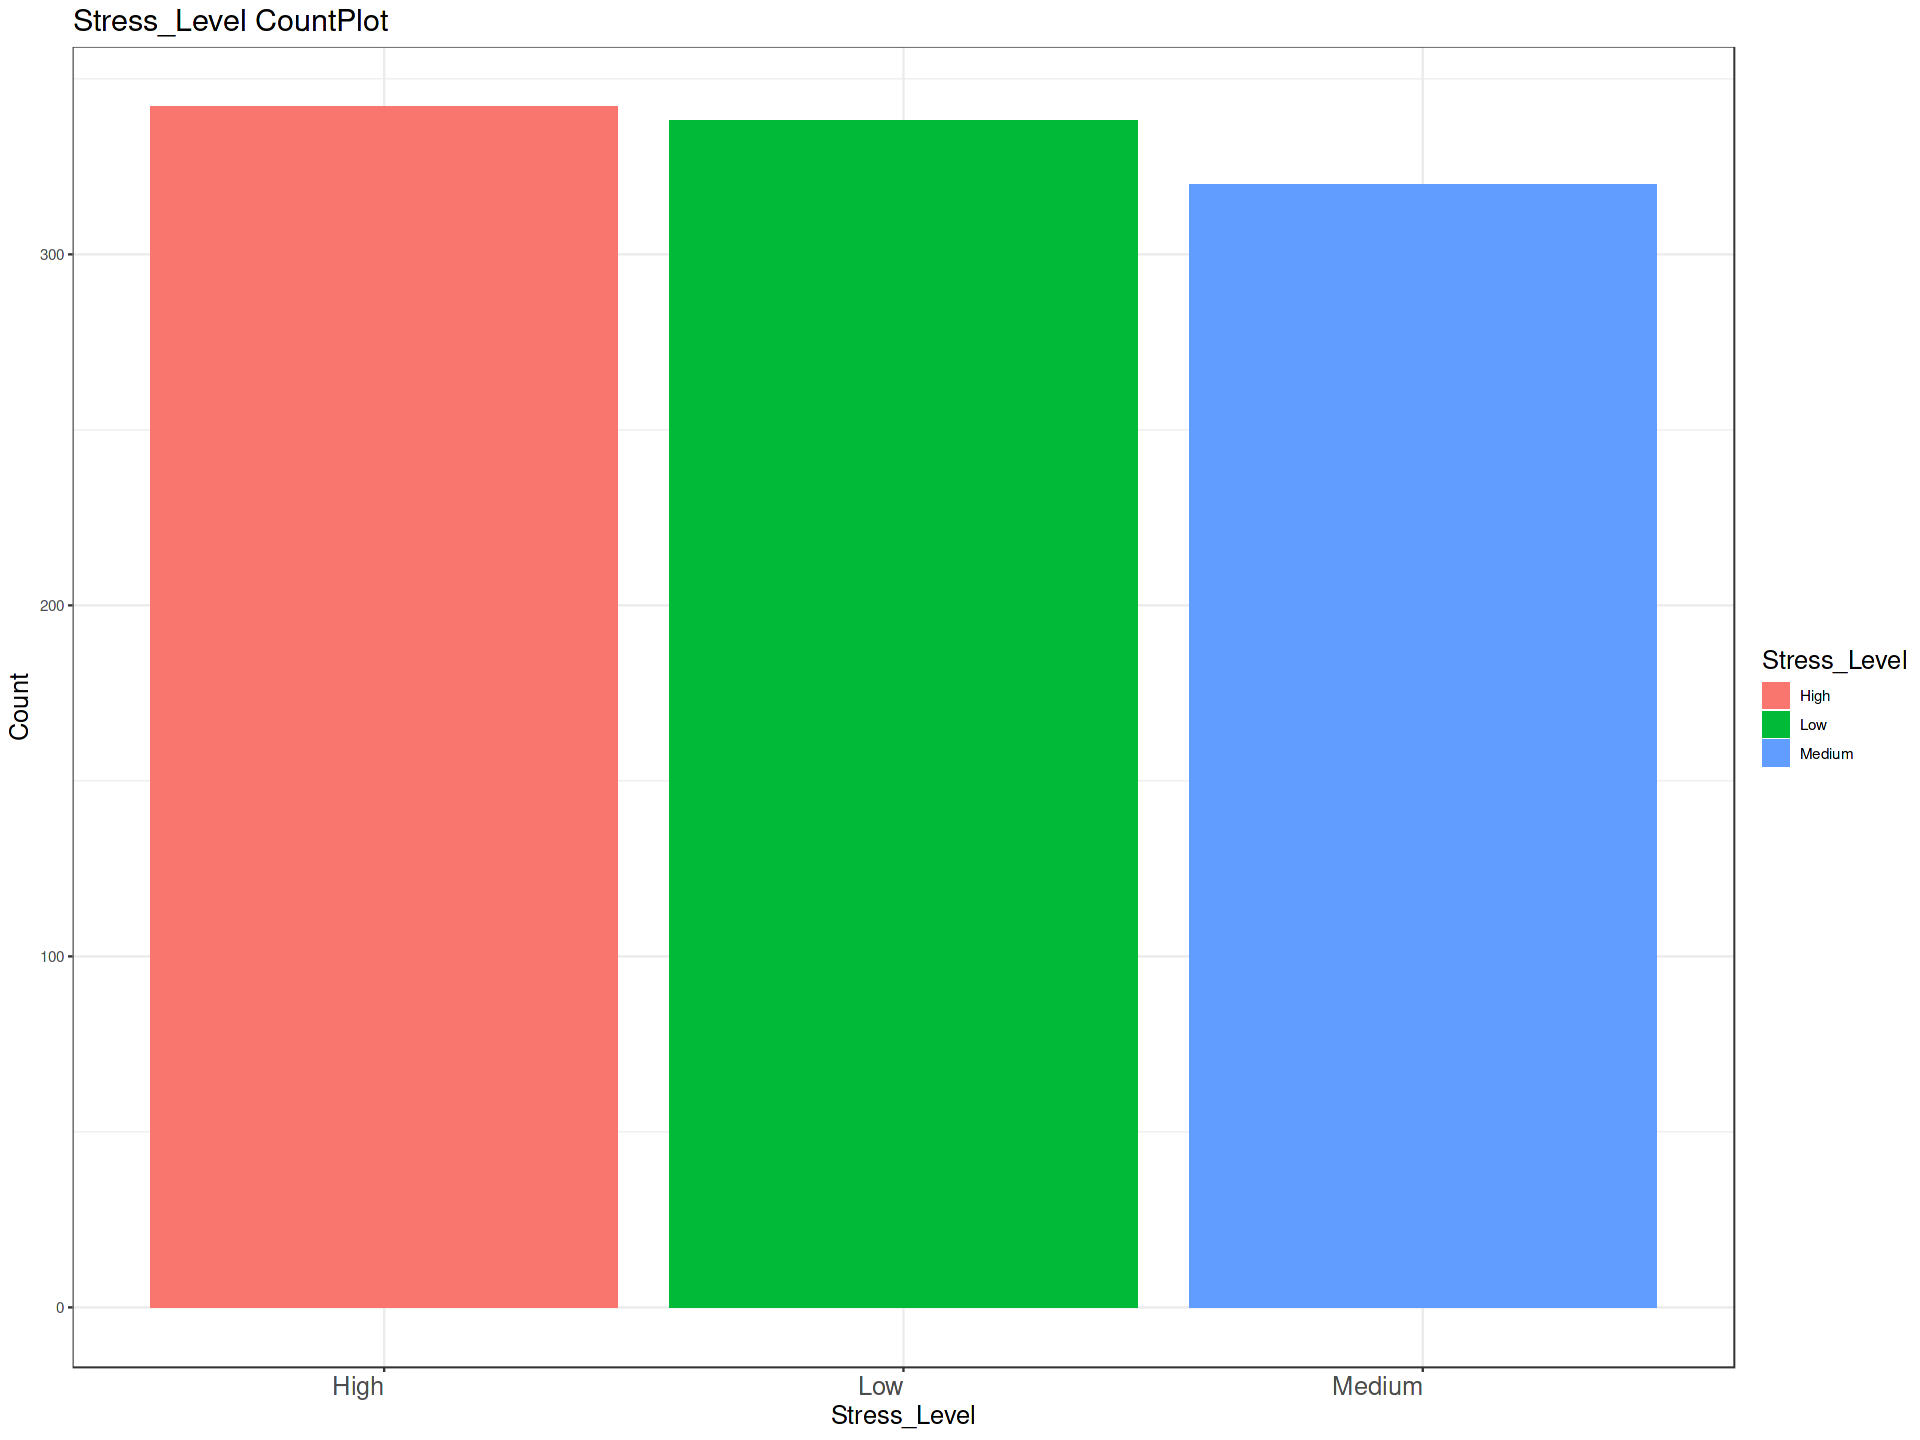

In [69]:
for(i in cat_cols){
    a <- ggplot(df) + geom_bar(aes(x= df[,i], fill = df[,i])) + 
            labs(title = paste0(names(df[i]),' CountPlot'), x = names(df[i]), y = 'Count', fill = i ) + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    grid.arrange(a, ncol = 1)  
}

##  **Stress_Level by Gender**

In [70]:
Stress_Gender <- df %>% group_by(Gender) %>% count(Stress_Level)

In [71]:
Stress_Gender

Gender,Stress_Level,n
<fct>,<fct>,<int>
Female,High,95
Female,Low,74
Female,Medium,101
Male,High,97
Male,Low,79
Male,Medium,71
Non-binary,High,85
Non-binary,Low,107
Non-binary,Medium,75


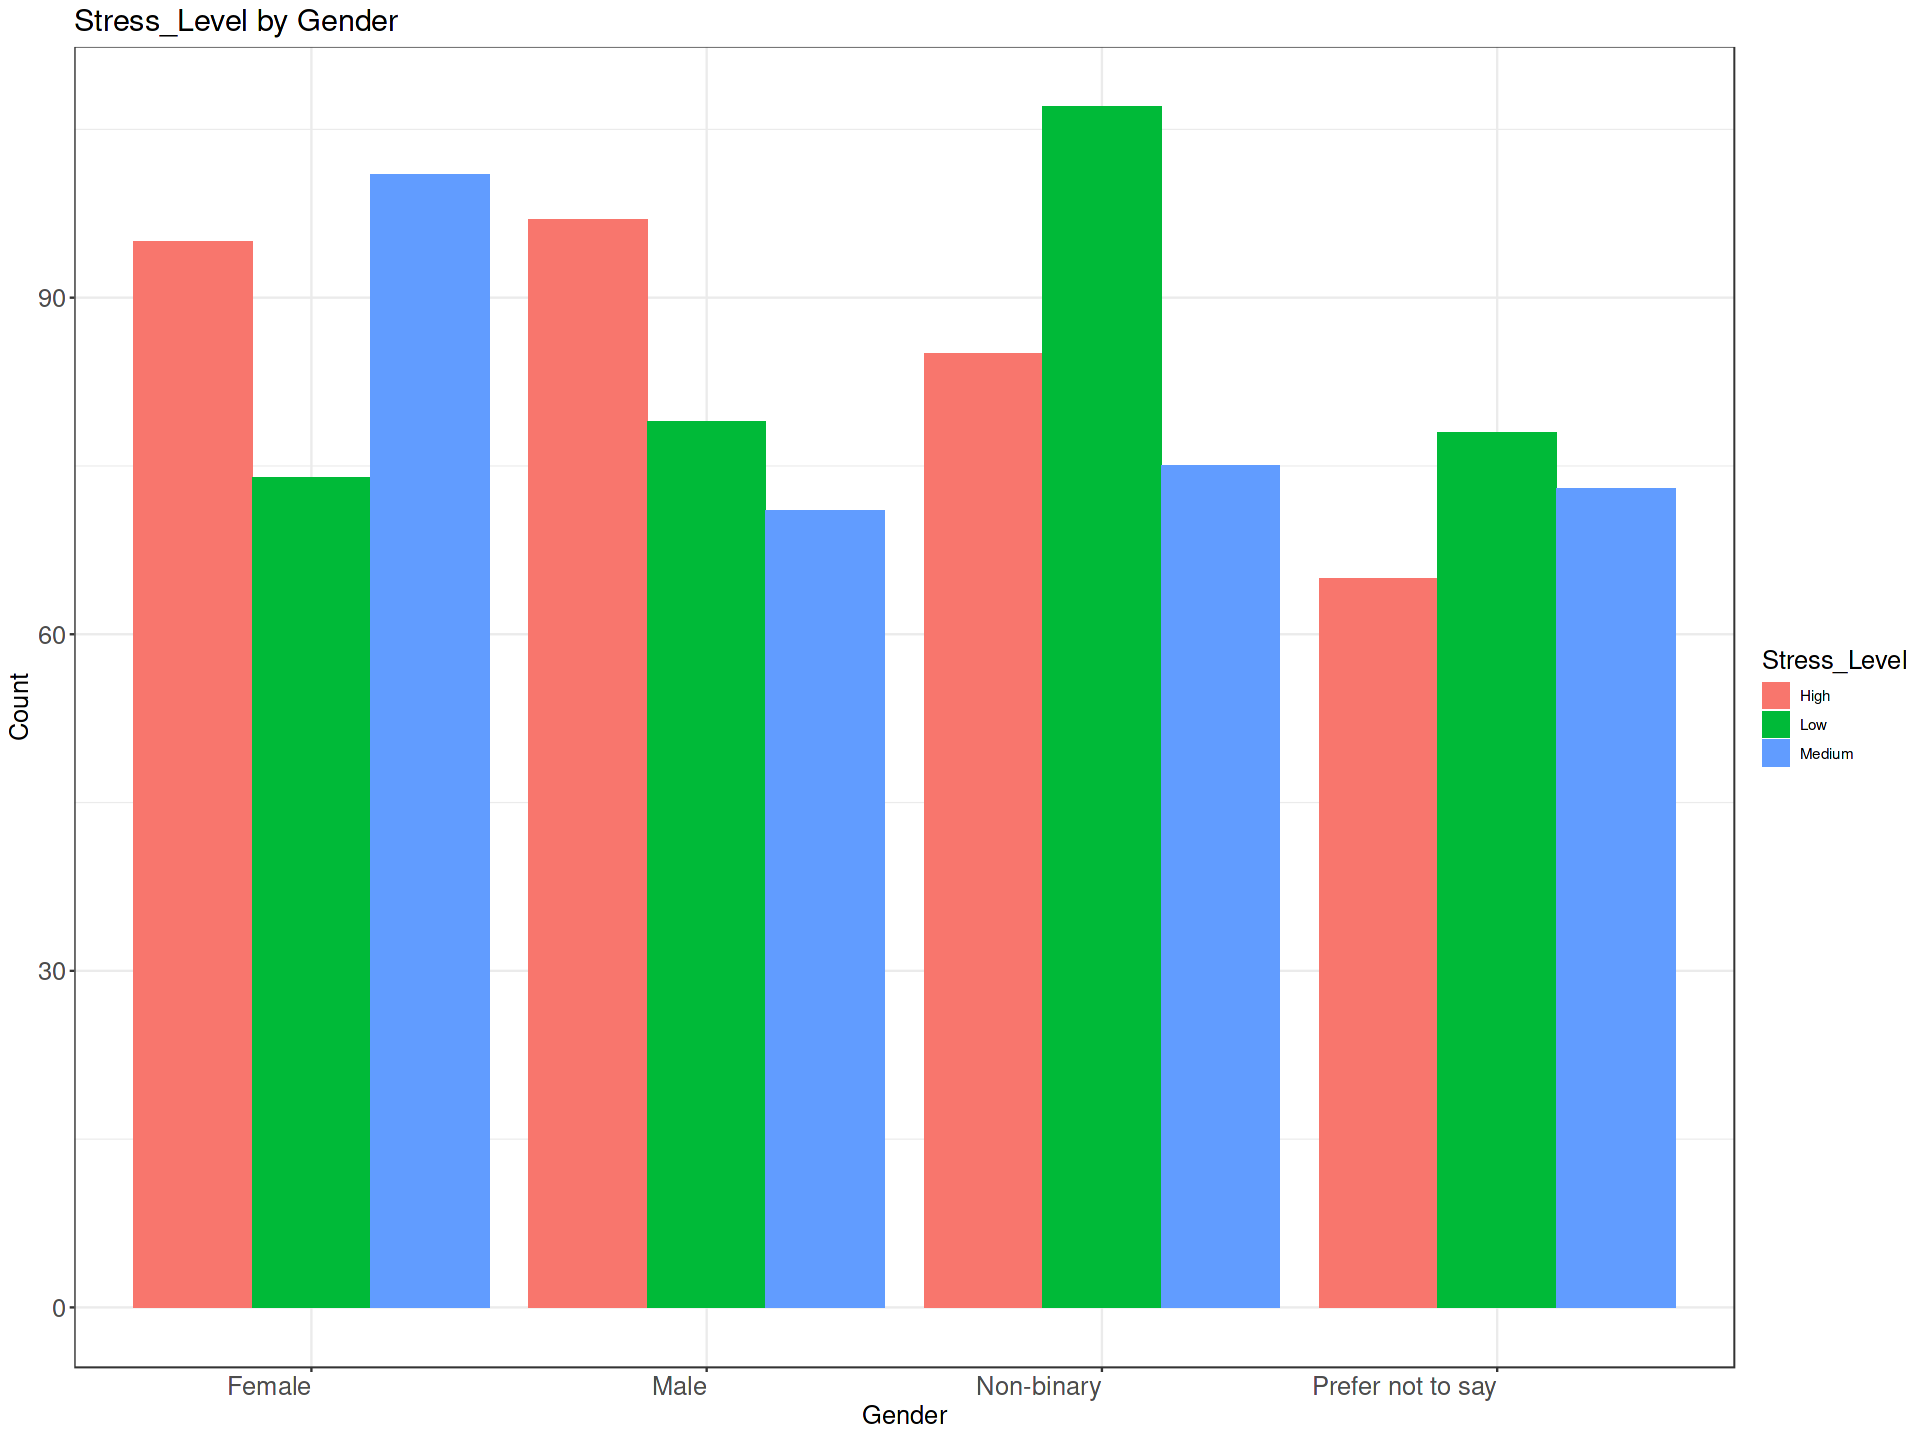

In [72]:
ggplot(Stress_Gender) + geom_col(aes(x= Gender, y= n,  fill = Stress_Level) ,position = "dodge") +
    ggtitle('Stress_Level by Gender')+
    ylab('Count')+
    theme_bw() +
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

## **Stress_Level by Mental_Health**

In [73]:
Stress_Mental <- df %>% group_by(Mental_Health_Condition) %>% count(Stress_Level)

In [74]:
Stress_Mental

Mental_Health_Condition,Stress_Level,n
<fct>,<fct>,<int>
No,High,162
No,Low,180
No,Medium,143
Yes,High,180
Yes,Low,158
Yes,Medium,177


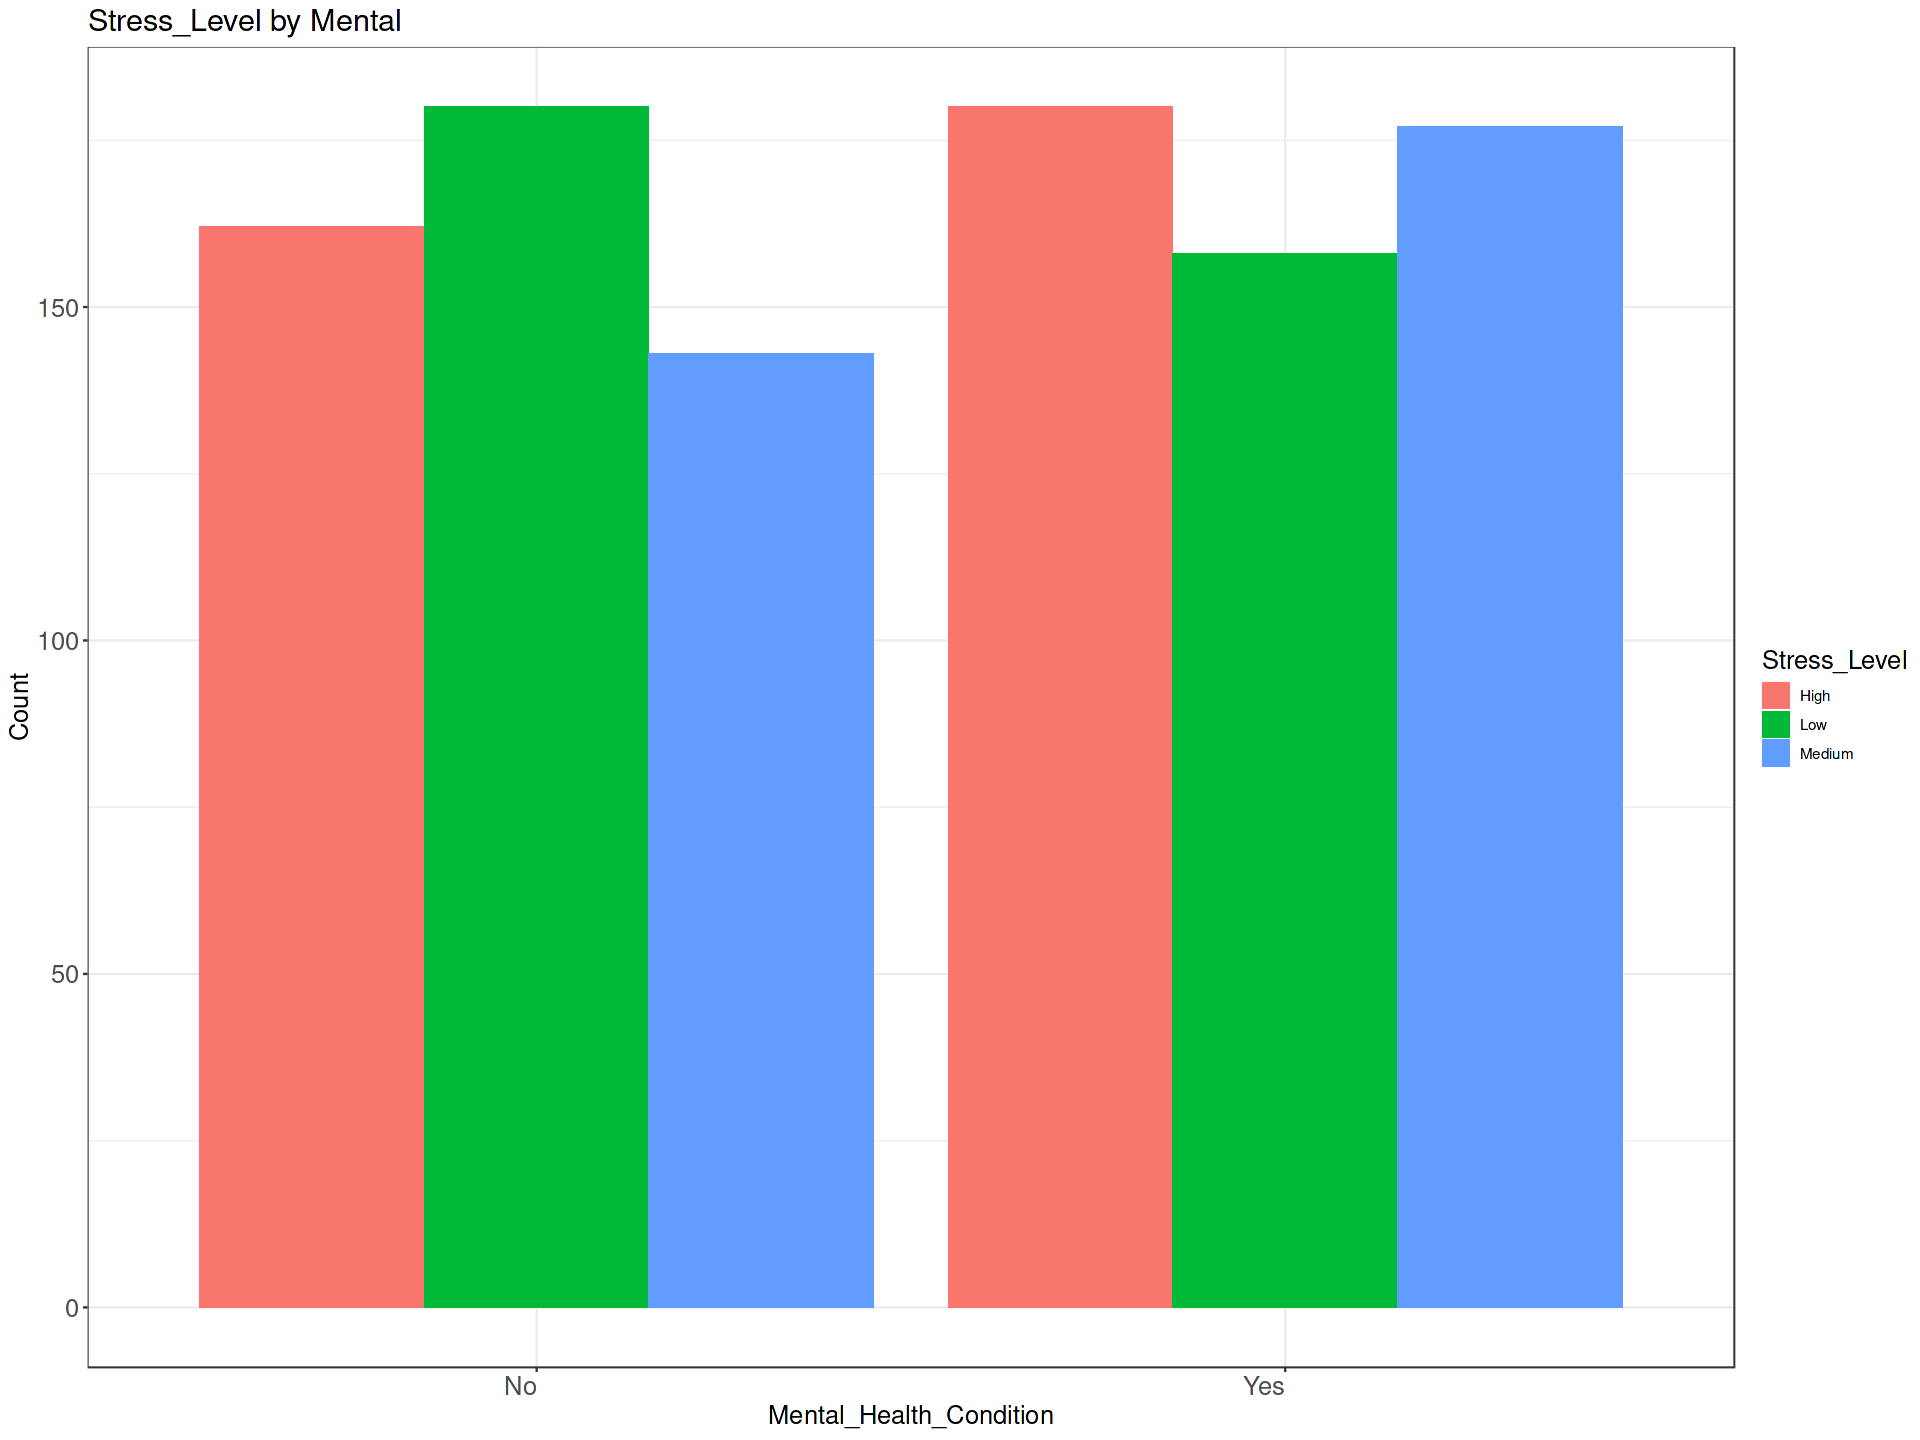

In [75]:
ggplot(Stress_Mental) + geom_col(aes(x= Mental_Health_Condition, y= n,  fill = Stress_Level) ,position = "dodge") +
    ggtitle('Stress_Level by Mental')+
    ylab('Count')+
    theme_bw() +
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

## **Stress levels by Sleep hours**

In [76]:
Avg_sleep <- df %>% group_by(factor(round(Sleep_Hours))) %>% count(Stress_Level)
names(Avg_sleep) <- c('Sleep_Hours','Stress_Level','Count')

In [77]:
Avg_sleep

Sleep_Hours,Stress_Level,Count
<fct>,<fct>,<int>
4,High,24
4,Low,22
4,Medium,29
5,High,43
5,Low,50
5,Medium,52
6,High,70
6,Low,55
6,Medium,58


In [78]:
sleep4 <- Avg_sleep %>% filter(Sleep_Hours == '4')
sleep5 <- Avg_sleep %>% filter(Sleep_Hours == '5')
sleep6 <- Avg_sleep %>% filter(Sleep_Hours == '6')
sleep7 <- Avg_sleep %>% filter(Sleep_Hours == '7')
sleep8 <- Avg_sleep %>% filter(Sleep_Hours == '8')
sleep9 <- Avg_sleep %>% filter(Sleep_Hours == '9')
sleep10 <- Avg_sleep %>% filter(Sleep_Hours == '10')

In [79]:
pct4 <- paste(round(sleep4$Count / sum(sleep4$Count) * 100 ,1),'%')
pct5 <- paste(round(sleep5$Count / sum(sleep5$Count) * 100 ,1),'%')
pct6 <- paste(round(sleep6$Count / sum(sleep6$Count) * 100 ,1),'%')
pct7 <- paste(round(sleep7$Count / sum(sleep7$Count) * 100 ,1),'%')
pct8 <- paste(round(sleep8$Count / sum(sleep8$Count) * 100 ,1),'%')
pct9 <- paste(round(sleep9$Count / sum(sleep9$Count) * 100 ,1),'%')
pct10 <- paste(round(sleep10$Count / sum(sleep10$Count) * 100 ,1),'%')

In [80]:
options(repr.plot.width = 25.0, repr.plot.height = 16.0)

In [81]:
a <- ggplot(sleep4, aes(x= 1 , y= Count , fill = Stress_Level)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct4), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Stress level when sleep time is 4 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

b <- ggplot(sleep5, aes(x= 1 , y= Count , fill = Stress_Level)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct5), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Stress level when sleep time is 5 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

c <- ggplot(sleep6, aes(x= 1 , y= Count , fill = Stress_Level)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct6), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Stress level when sleep time is 6 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

d <- ggplot(sleep7, aes(x= 1 , y= Count , fill = Stress_Level)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct7), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Stress level when sleep time is 7 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

e <- ggplot(sleep8, aes(x= 1 , y= Count , fill = Stress_Level)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct8), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Stress level when sleep time is 8 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

f <- ggplot(sleep9, aes(x= 1 , y= Count , fill = Stress_Level)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct9), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Stress level when sleep time is 9 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

g <- ggplot(sleep10, aes(x= 1 , y= Count , fill = Stress_Level)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct10), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Stress level when sleep time is 10 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )


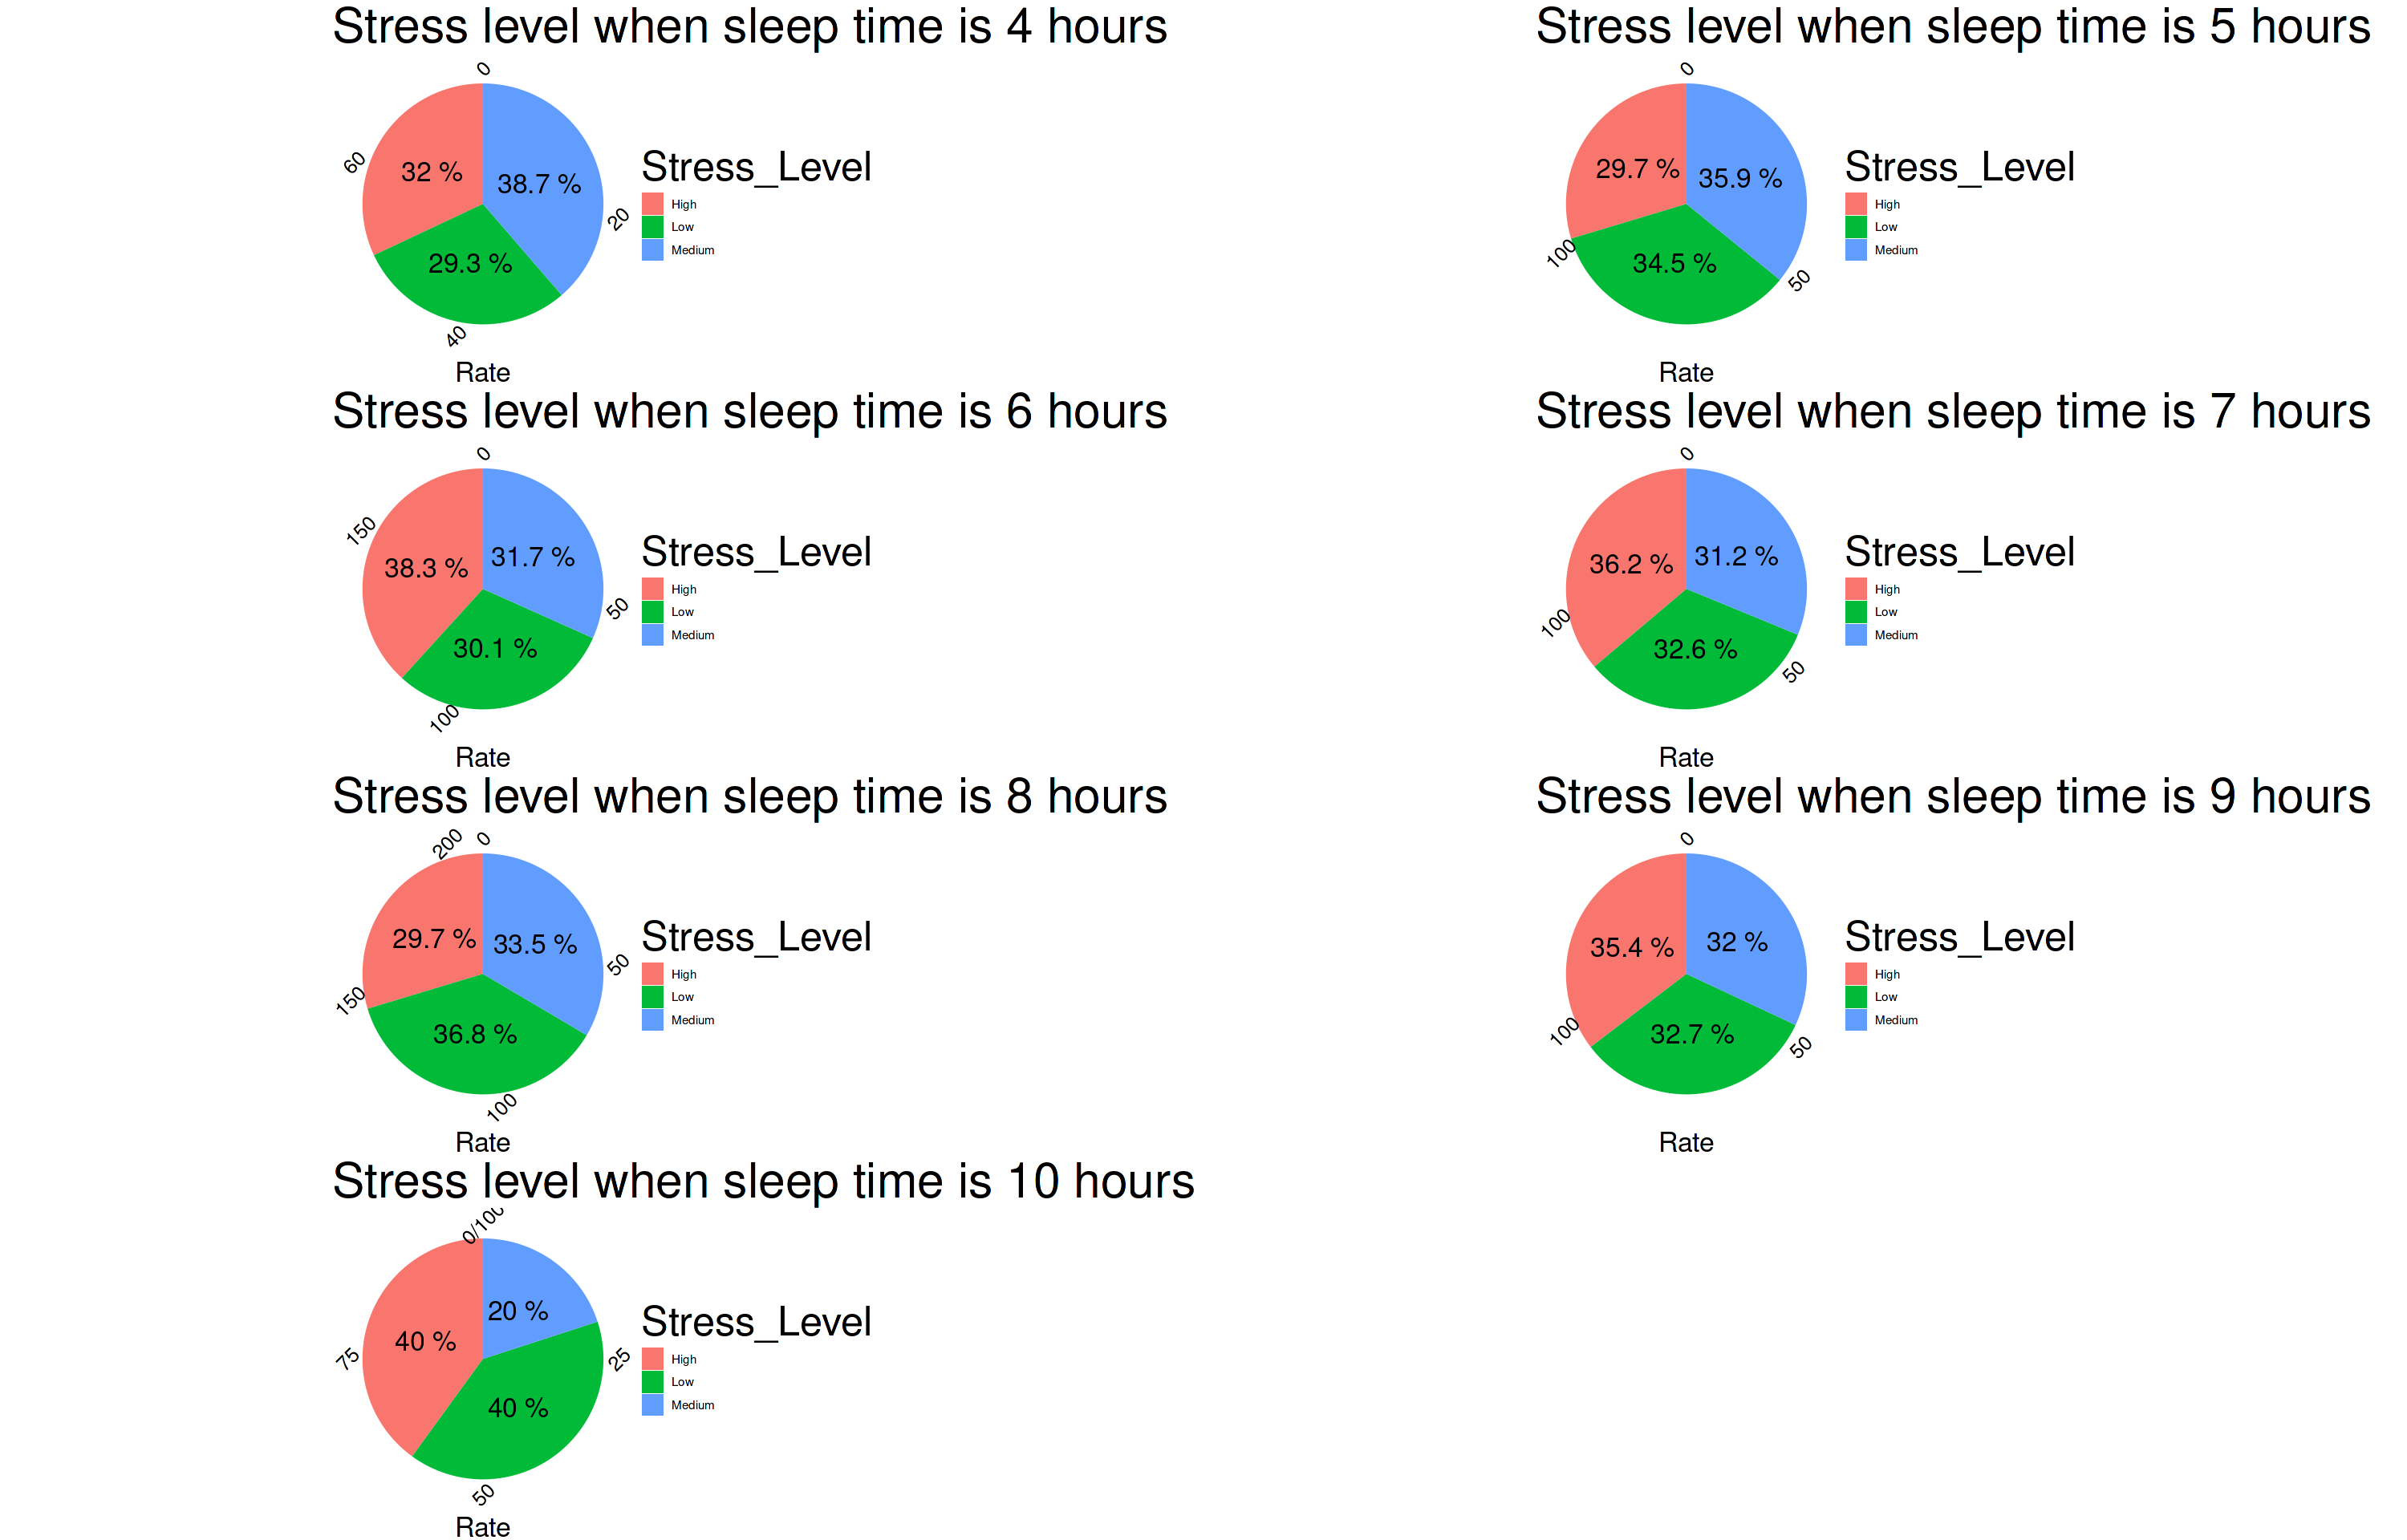

In [82]:
grid.arrange(a,b,c,d,e,f,g , ncol = 2)

## **Mental Health by Sleep hours**

In [83]:
Avg_mental <- df %>% group_by(factor(round(Sleep_Hours))) %>% count(Mental_Health_Condition)
names(Avg_mental) <- c('Sleep_Hours','Mental_Health_Condition','Count')

In [84]:
Avg_mental

Sleep_Hours,Mental_Health_Condition,Count
<fct>,<fct>,<int>
4,No,32
4,Yes,43
5,No,68
5,Yes,77
6,No,91
6,Yes,92
7,No,67
7,Yes,74
8,No,109


In [85]:
sleep4 <- Avg_mental %>% filter(Sleep_Hours == '4')
sleep5 <- Avg_mental %>% filter(Sleep_Hours == '5')
sleep6 <- Avg_mental %>% filter(Sleep_Hours == '6')
sleep7 <- Avg_mental %>% filter(Sleep_Hours == '7')
sleep8 <- Avg_mental %>% filter(Sleep_Hours == '8')
sleep9 <- Avg_mental %>% filter(Sleep_Hours == '9')
sleep10 <- Avg_mental %>% filter(Sleep_Hours == '10')

In [86]:
pct4 <- paste(round(sleep4$Count / sum(sleep4$Count) * 100 ,1),'%')
pct5 <- paste(round(sleep5$Count / sum(sleep5$Count) * 100 ,1),'%')
pct6 <- paste(round(sleep6$Count / sum(sleep6$Count) * 100 ,1),'%')
pct7 <- paste(round(sleep7$Count / sum(sleep7$Count) * 100 ,1),'%')
pct8 <- paste(round(sleep8$Count / sum(sleep8$Count) * 100 ,1),'%')
pct9 <- paste(round(sleep9$Count / sum(sleep9$Count) * 100 ,1),'%')
pct10 <- paste(round(sleep10$Count / sum(sleep10$Count) * 100 ,1),'%')

In [87]:
a <- ggplot(sleep4, aes(x= 1 , y= Count , fill = Mental_Health_Condition)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct4), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Mental Health when sleep time is 4 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

b <- ggplot(sleep5, aes(x= 1 , y= Count , fill = Mental_Health_Condition)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct5), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Mental Health when sleep time is 5 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

c <- ggplot(sleep6, aes(x= 1 , y= Count , fill = Mental_Health_Condition)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct6), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Mental Health when sleep time is 6 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

d <- ggplot(sleep7, aes(x= 1 , y= Count , fill = Mental_Health_Condition)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct7), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Mental Health when sleep time is 7 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

e <- ggplot(sleep8, aes(x= 1 , y= Count , fill = Mental_Health_Condition)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct8), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Mental Health when sleep time is 8 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

f <- ggplot(sleep9, aes(x= 1 , y= Count , fill = Mental_Health_Condition)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct9), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Mental Health when sleep time is 9 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

g <- ggplot(sleep10, aes(x= 1 , y= Count , fill = Mental_Health_Condition)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct10), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('Mental Health when sleep time is 10 hours') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )


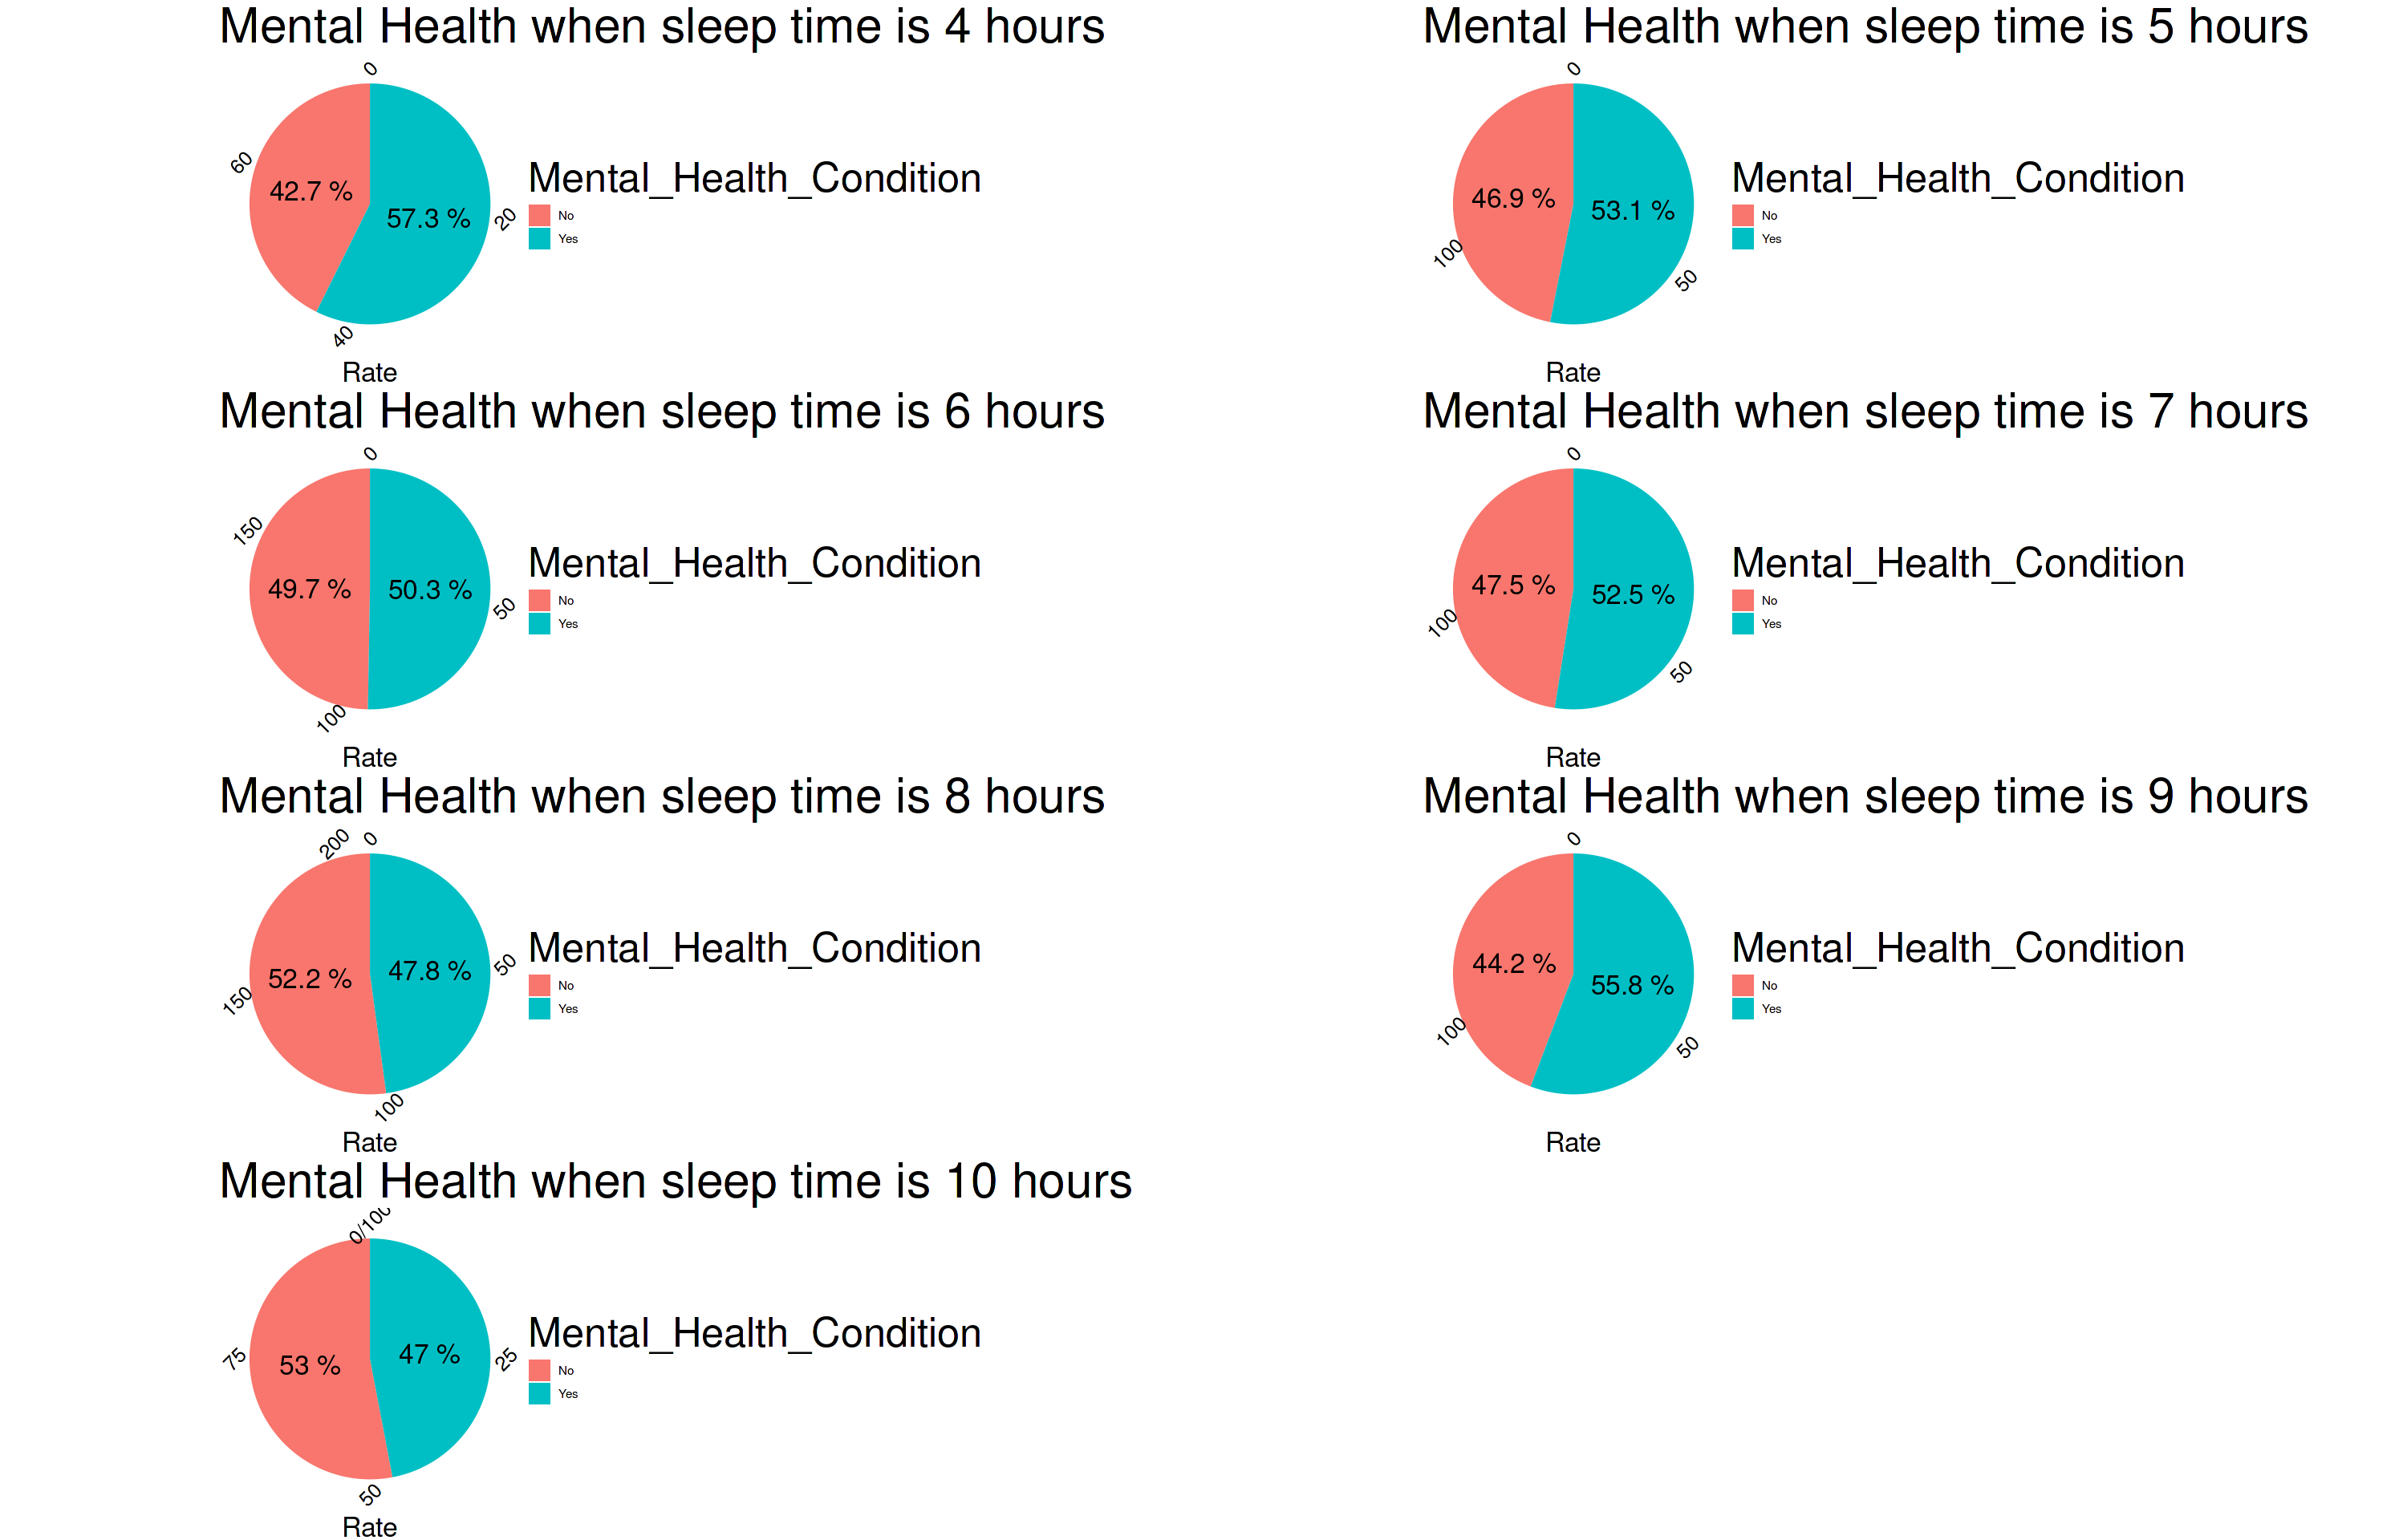

In [88]:
grid.arrange(a,b,c,d,e,f,g , ncol = 2)

## **Correlation**

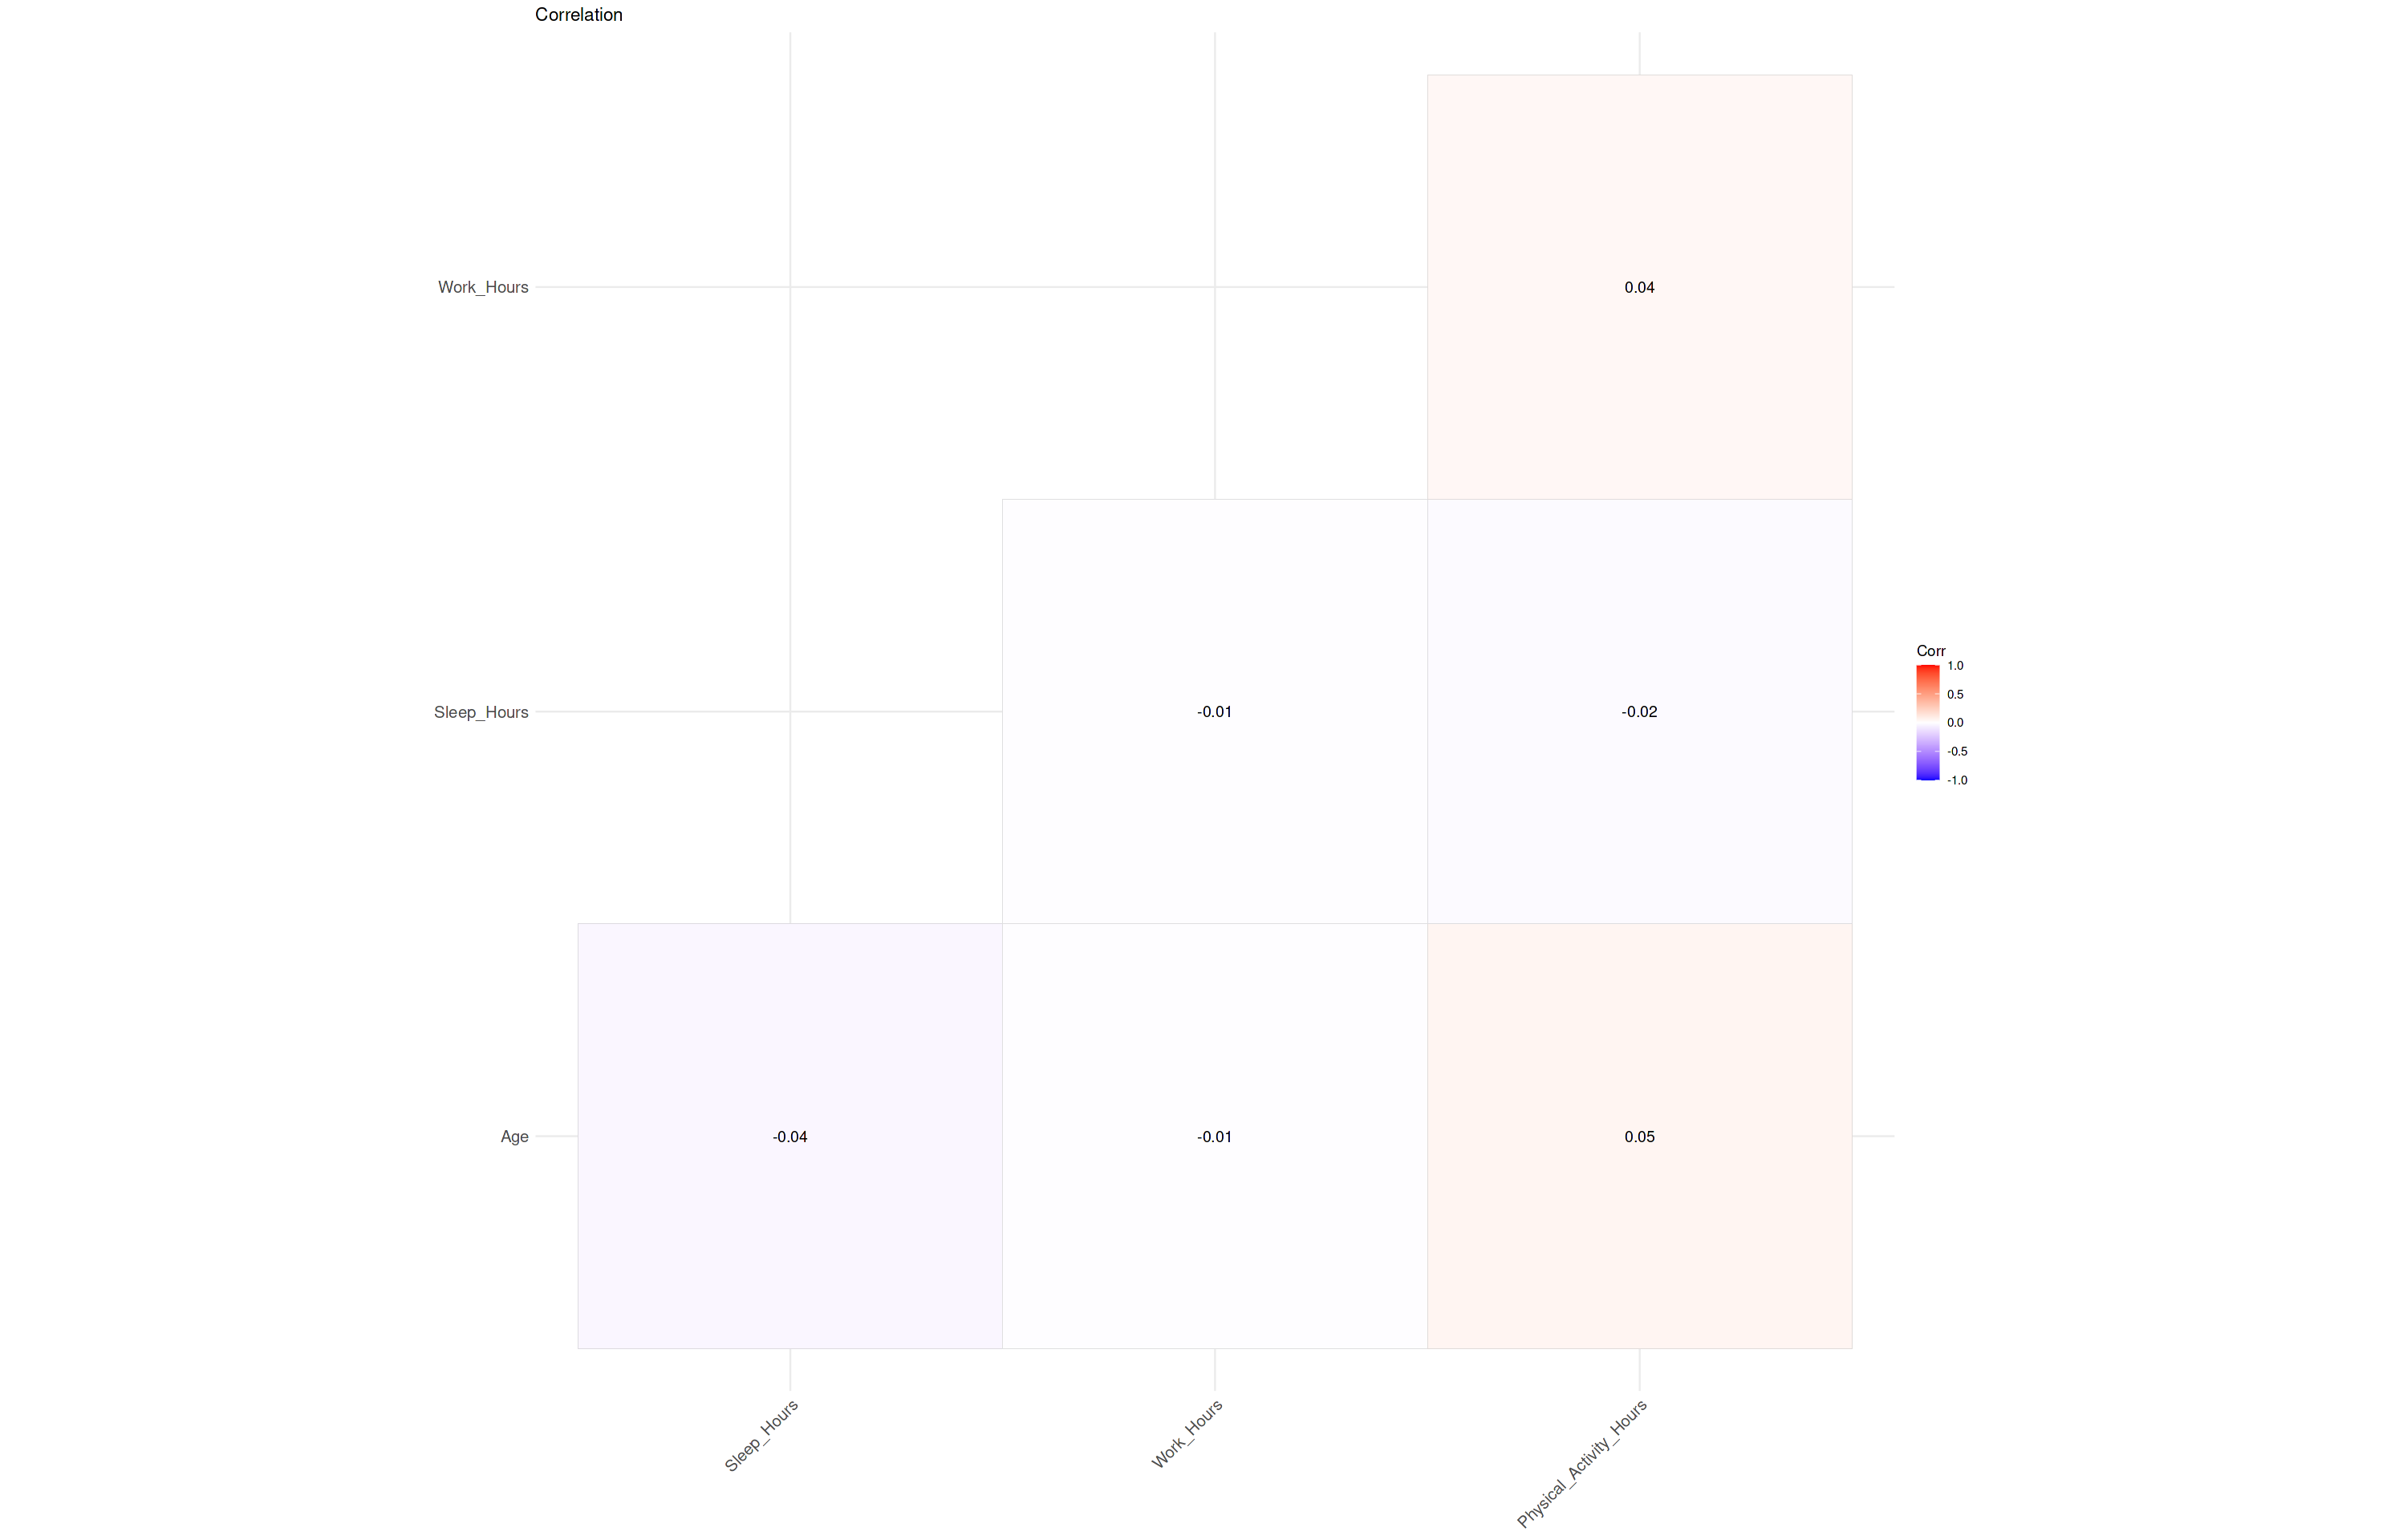

In [89]:
ggcorrplot(cor(df[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

## **Import**

In [90]:
library(randomForest)
library(Metrics)
library(caret)
library(mltools)
library(data.table)
library(rpart)
library(e1071)

##  **Preprocessing**

In [91]:
df <- df %>% select(-User_ID)

In [92]:
names(df)

[1] "Age"                     "Gender"                 
 [3] "Occupation"              "Country"                
 [5] "Mental_Health_Condition" "Severity"               
 [7] "Consultation_History"    "Stress_Level"           
 [9] "Sleep_Hours"             "Work_Hours"             
[11] "Physical_Activity_Hours"

## **Split Data**

In [93]:
idx <- sample(nrow(df), nrow(df) * 0.75)
train <- df[idx,]
test <- df[-idx, ]

## **Decision tree & K-FOLD**

In [94]:
ctrl <- trainControl(method = "repeatedcv",
                     repeats = 5,
                     number = 5,
                     verboseIter = TRUE)

Dtree <- train(Mental_Health_Condition ~ .,
                     data = train,
                     method = "rpart",
                     trControl = ctrl)

print(Dtree)

+ Fold1.Rep1: cp=0.01078 
- Fold1.Rep1: cp=0.01078 
+ Fold2.Rep1: cp=0.01078 
- Fold2.Rep1: cp=0.01078 
+ Fold3.Rep1: cp=0.01078 
- Fold3.Rep1: cp=0.01078 
+ Fold4.Rep1: cp=0.01078 
- Fold4.Rep1: cp=0.01078 
+ Fold5.Rep1: cp=0.01078 
- Fold5.Rep1: cp=0.01078 
+ Fold1.Rep2: cp=0.01078 
- Fold1.Rep2: cp=0.01078 
+ Fold2.Rep2: cp=0.01078 
- Fold2.Rep2: cp=0.01078 
+ Fold3.Rep2: cp=0.01078 
- Fold3.Rep2: cp=0.01078 
+ Fold4.Rep2: cp=0.01078 
- Fold4.Rep2: cp=0.01078 
+ Fold5.Rep2: cp=0.01078 
- Fold5.Rep2: cp=0.01078 
+ Fold1.Rep3: cp=0.01078 
- Fold1.Rep3: cp=0.01078 
+ Fold2.Rep3: cp=0.01078 
- Fold2.Rep3: cp=0.01078 
+ Fold3.Rep3: cp=0.01078 
- Fold3.Rep3: cp=0.01078 
+ Fold4.Rep3: cp=0.01078 
- Fold4.Rep3: cp=0.01078 
+ Fold5.Rep3: cp=0.01078 
- Fold5.Rep3: cp=0.01078 
+ Fold1.Rep4: cp=0.01078 
- Fold1.Rep4: cp=0.01078 
+ Fold2.Rep4: cp=0.01078 
- Fold2.Rep4: cp=0.01078 
+ Fold3.Rep4: cp=0.01078 
- Fold3.Rep4: cp=0.01078 
+ Fold4.Rep4: cp=0.01078 
- Fold4.Rep4: cp=0.01078 
+ Fold5.Rep4

In [95]:
pred_dtree <- predict(Dtree, test)

In [96]:
dtree_cm <- confusionMatrix(pred_dtree, test$Mental_Health_Condition)

In [97]:
dtree_cm

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  34  63
       Yes 72  81
                                         
               Accuracy : 0.46           
                 95% CI : (0.397, 0.5239)
    No Information Rate : 0.576          
    P-Value [Acc > NIR] : 0.9999         
                                         
                  Kappa : -0.1181        
                                         
 Mcnemar's Test P-Value : 0.4911         
                                         
            Sensitivity : 0.3208         
            Specificity : 0.5625         
         Pos Pred Value : 0.3505         
         Neg Pred Value : 0.5294         
             Prevalence : 0.4240         
         Detection Rate : 0.1360         
   Detection Prevalence : 0.3880         
      Balanced Accuracy : 0.4416         
                                         
       'Positive' Class : No             
                                         

In [98]:
dtree_ <- data.frame(dtree_cm$table)

In [99]:
options(repr.plot.width = 12.0, repr.plot.height = 12.0)

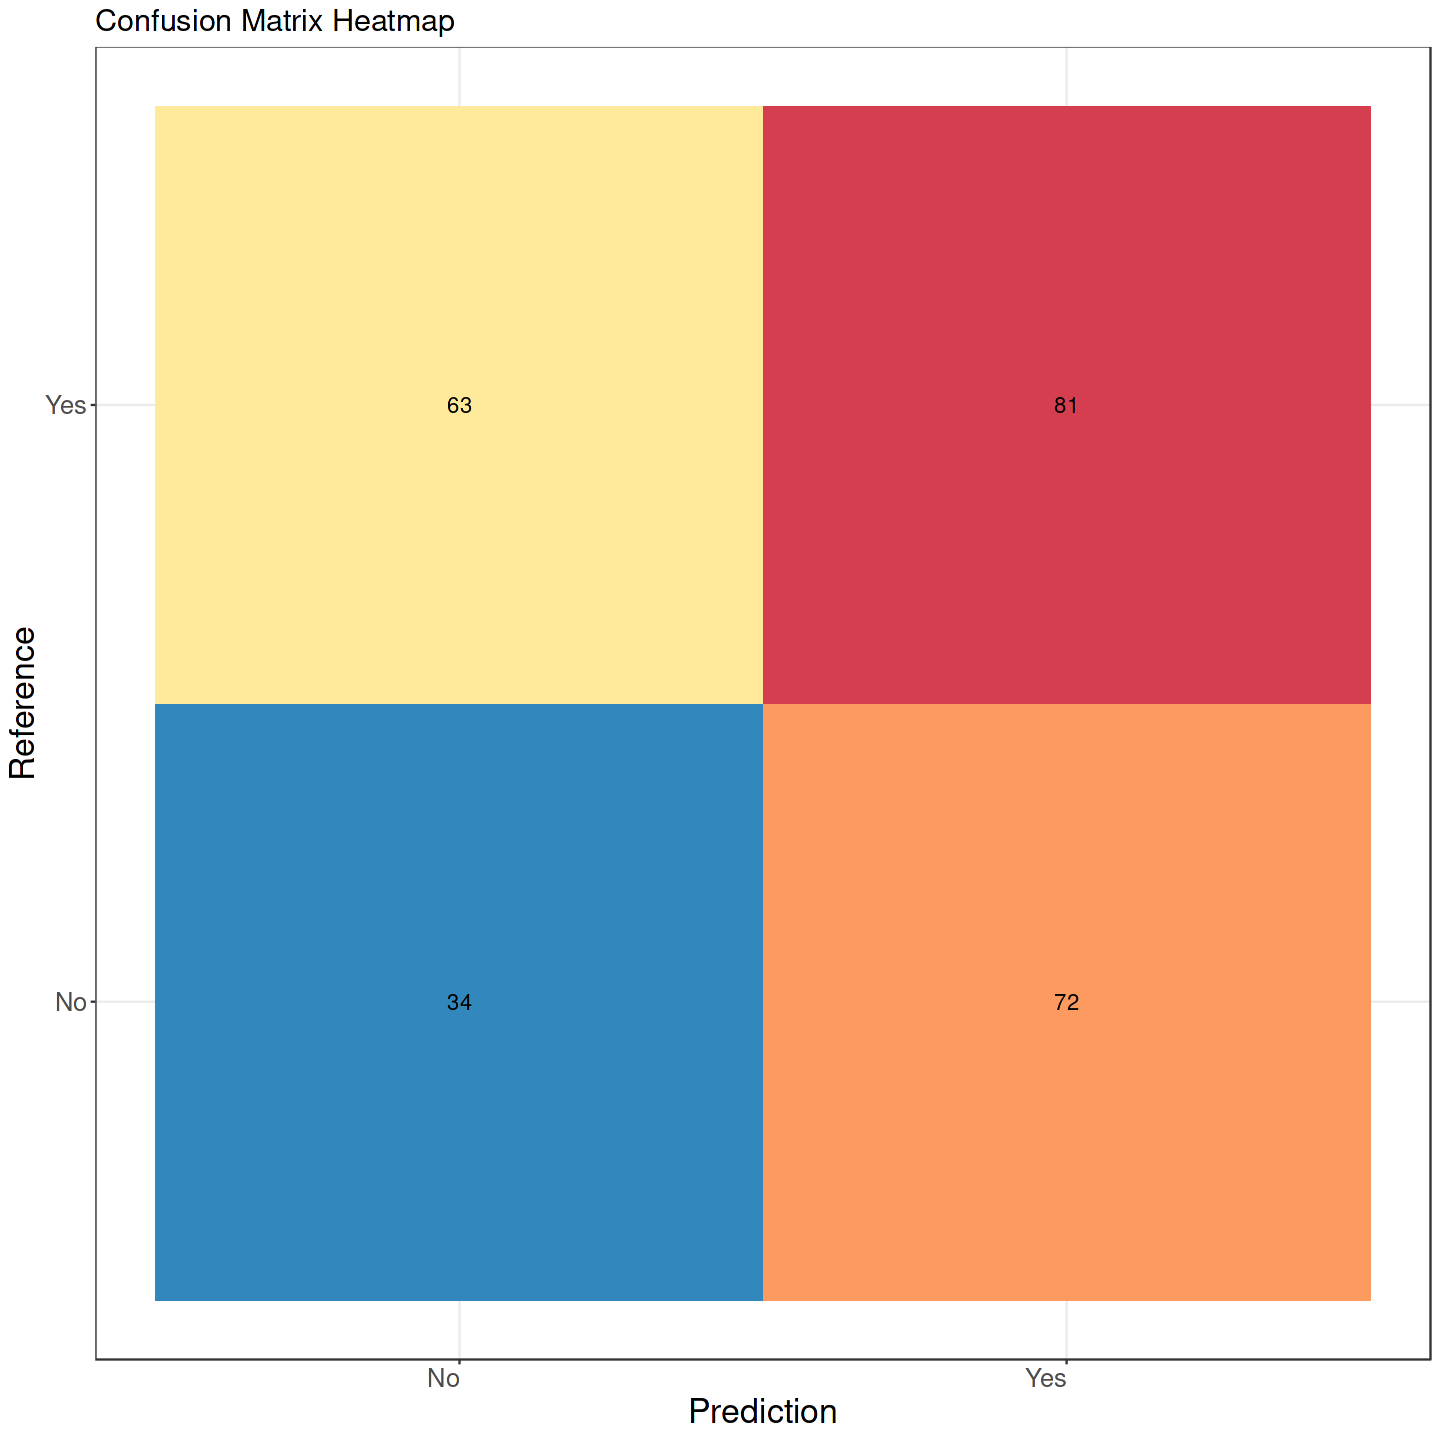

In [100]:
ggplot(dtree_) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 40), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 15, hjust=1),
                axis.text.y = element_text(size = 15, hjust=1),
                title = element_text(size=15)
                )

## **RandomForest & K-FOLD**

In [101]:
ctrl <- trainControl(method = "repeatedcv",
                     repeats = 5,
                     number = 5,
                     verboseIter = TRUE)

rf <- train(Mental_Health_Condition ~ .,
                     data = train,
                     method = "rf",
                     trControl = ctrl)

print(rf)

+ Fold1.Rep1: mtry= 2 
- Fold1.Rep1: mtry= 2 
+ Fold1.Rep1: mtry=13 
- Fold1.Rep1: mtry=13 
+ Fold1.Rep1: mtry=25 
- Fold1.Rep1: mtry=25 
+ Fold2.Rep1: mtry= 2 
- Fold2.Rep1: mtry= 2 
+ Fold2.Rep1: mtry=13 
- Fold2.Rep1: mtry=13 
+ Fold2.Rep1: mtry=25 
- Fold2.Rep1: mtry=25 
+ Fold3.Rep1: mtry= 2 
- Fold3.Rep1: mtry= 2 
+ Fold3.Rep1: mtry=13 
- Fold3.Rep1: mtry=13 
+ Fold3.Rep1: mtry=25 
- Fold3.Rep1: mtry=25 
+ Fold4.Rep1: mtry= 2 
- Fold4.Rep1: mtry= 2 
+ Fold4.Rep1: mtry=13 
- Fold4.Rep1: mtry=13 
+ Fold4.Rep1: mtry=25 
- Fold4.Rep1: mtry=25 
+ Fold5.Rep1: mtry= 2 
- Fold5.Rep1: mtry= 2 
+ Fold5.Rep1: mtry=13 
- Fold5.Rep1: mtry=13 
+ Fold5.Rep1: mtry=25 
- Fold5.Rep1: mtry=25 
+ Fold1.Rep2: mtry= 2 
- Fold1.Rep2: mtry= 2 
+ Fold1.Rep2: mtry=13 
- Fold1.Rep2: mtry=13 
+ Fold1.Rep2: mtry=25 
- Fold1.Rep2: mtry=25 
+ Fold2.Rep2: mtry= 2 
- Fold2.Rep2: mtry= 2 
+ Fold2.Rep2: mtry=13 
- Fold2.Rep2: mtry=13 
+ Fold2.Rep2: mtry=25 
- Fold2.Rep2: mtry=25 
+ Fold3.Rep2: mtry= 2 
- Fold3.Rep

In [102]:
pred_rf <- predict(rf, test)

In [103]:
rf_cm <- confusionMatrix(pred_rf, test$Mental_Health_Condition)

In [104]:
rf_cm

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  61  87
       Yes 45  57
                                          
               Accuracy : 0.472           
                 95% CI : (0.4088, 0.5359)
    No Information Rate : 0.576           
    P-Value [Acc > NIR] : 0.9996236       
                                          
                  Kappa : -0.0273         
                                          
 Mcnemar's Test P-Value : 0.0003589       
                                          
            Sensitivity : 0.5755          
            Specificity : 0.3958          
         Pos Pred Value : 0.4122          
         Neg Pred Value : 0.5588          
             Prevalence : 0.4240          
         Detection Rate : 0.2440          
   Detection Prevalence : 0.5920          
      Balanced Accuracy : 0.4857          
                                          
       'Positive' Class : No              
                                 

In [105]:
rf_ <- data.frame(rf_cm$table)

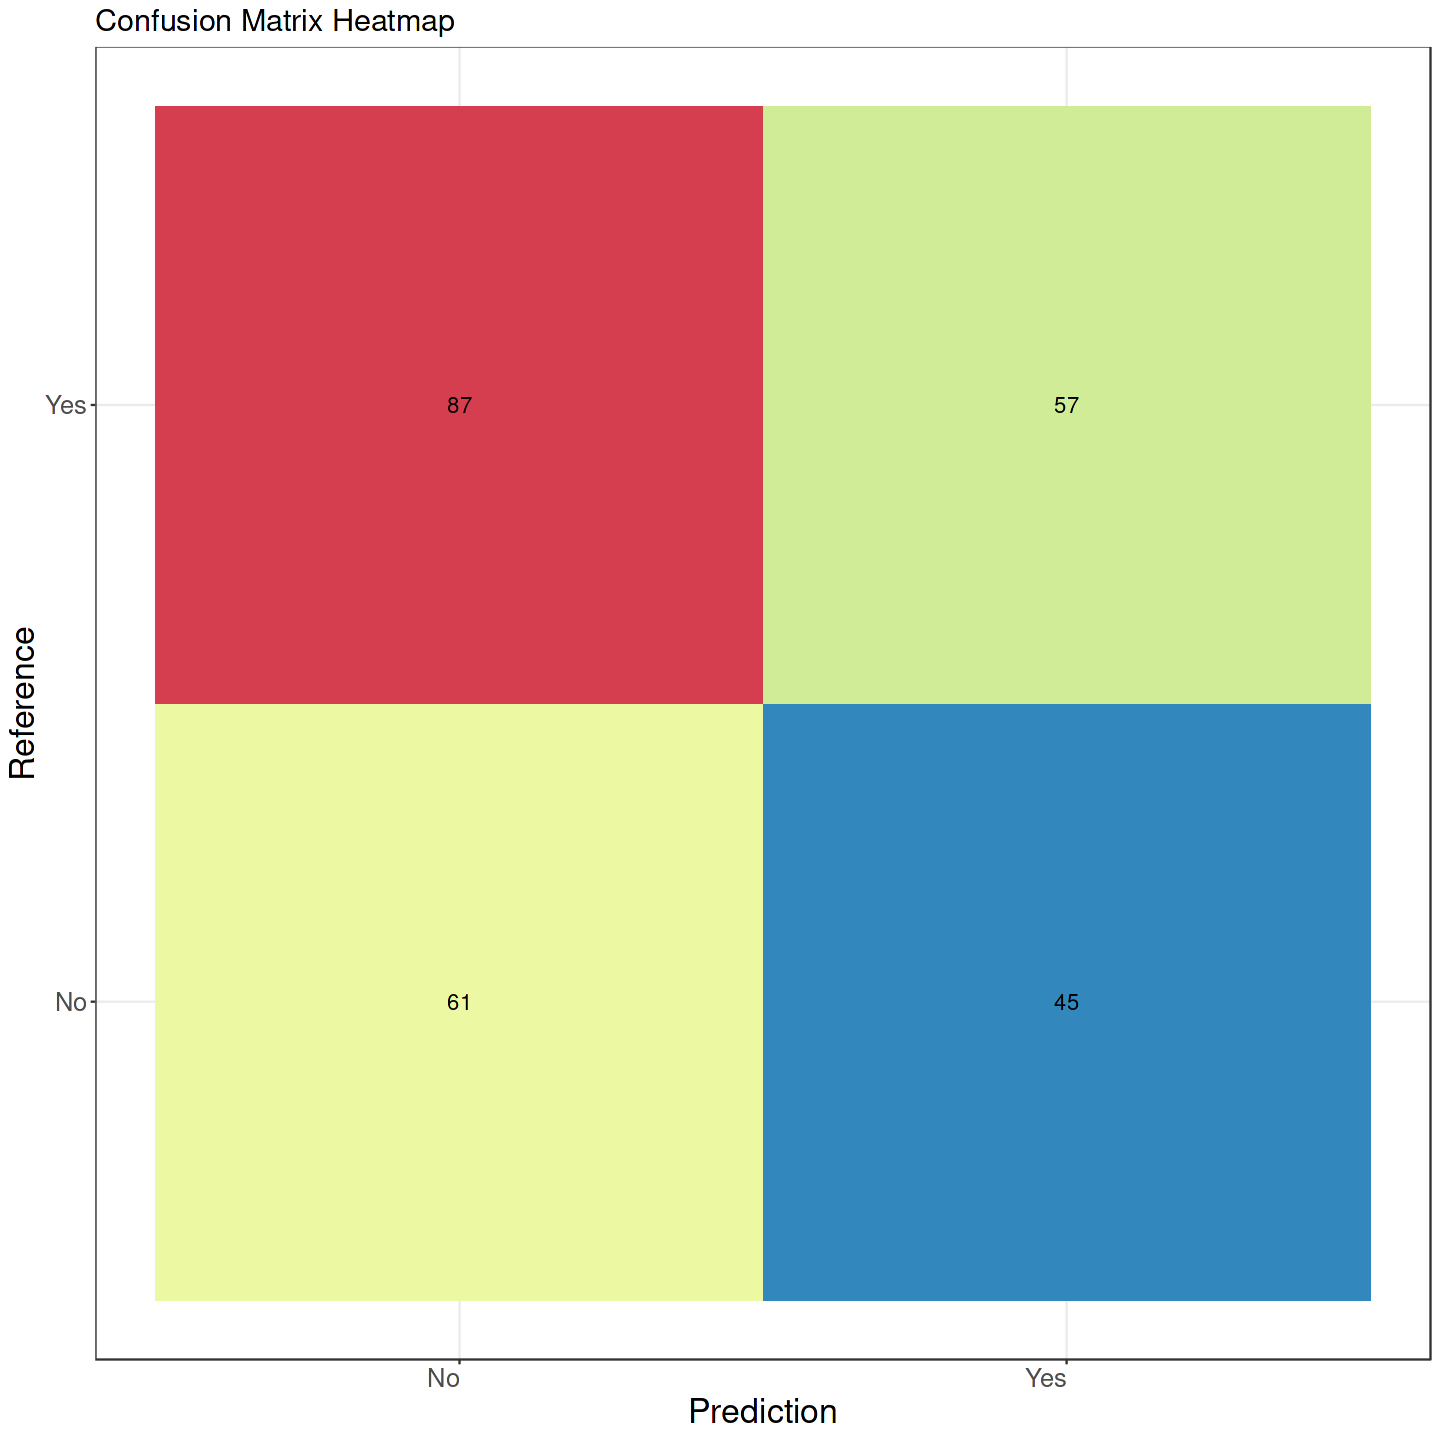

In [106]:
ggplot(rf_) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 40), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 15, hjust=1),
                axis.text.y = element_text(size = 15, hjust=1),
                title = element_text(size=15)
                )

## **Logistic Regression & K-FOLD**

In [107]:
ctrl <- trainControl(method = "repeatedcv",
                     repeats = 5,
                     number = 5,
                     verboseIter = TRUE)

mglm <- train(Mental_Health_Condition ~ .,
                     data = train,
                     method = "glm",
                     trControl = ctrl)

print(mglm)

+ Fold1.Rep1: parameter=none 
- Fold1.Rep1: parameter=none 
+ Fold2.Rep1: parameter=none 
- Fold2.Rep1: parameter=none 
+ Fold3.Rep1: parameter=none 
- Fold3.Rep1: parameter=none 
+ Fold4.Rep1: parameter=none 
- Fold4.Rep1: parameter=none 
+ Fold5.Rep1: parameter=none 
- Fold5.Rep1: parameter=none 
+ Fold1.Rep2: parameter=none 
- Fold1.Rep2: parameter=none 
+ Fold2.Rep2: parameter=none 
- Fold2.Rep2: parameter=none 
+ Fold3.Rep2: parameter=none 
- Fold3.Rep2: parameter=none 
+ Fold4.Rep2: parameter=none 
- Fold4.Rep2: parameter=none 
+ Fold5.Rep2: parameter=none 
- Fold5.Rep2: parameter=none 
+ Fold1.Rep3: parameter=none 
- Fold1.Rep3: parameter=none 
+ Fold2.Rep3: parameter=none 
- Fold2.Rep3: parameter=none 
+ Fold3.Rep3: parameter=none 
- Fold3.Rep3: parameter=none 
+ Fold4.Rep3: parameter=none 
- Fold4.Rep3: parameter=none 
+ Fold5.Rep3: parameter=none 
- Fold5.Rep3: parameter=none 
+ Fold1.Rep4: parameter=none 
- Fold1.Rep4: parameter=none 
+ Fold2.Rep4: parameter=none 
- Fold2.Re

In [108]:
pred_glm <- predict(mglm, test)

In [109]:
glm_cm <- confusionMatrix(pred_glm, test$Mental_Health_Condition)

In [110]:
glm_cm

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  64  78
       Yes 42  66
                                          
               Accuracy : 0.52            
                 95% CI : (0.4562, 0.5834)
    No Information Rate : 0.576           
    P-Value [Acc > NIR] : 0.967797        
                                          
                  Kappa : 0.0594          
                                          
 Mcnemar's Test P-Value : 0.001398        
                                          
            Sensitivity : 0.6038          
            Specificity : 0.4583          
         Pos Pred Value : 0.4507          
         Neg Pred Value : 0.6111          
             Prevalence : 0.4240          
         Detection Rate : 0.2560          
   Detection Prevalence : 0.5680          
      Balanced Accuracy : 0.5311          
                                          
       'Positive' Class : No              
                                 

In [111]:
mglm_ <- data.frame(glm_cm$table)

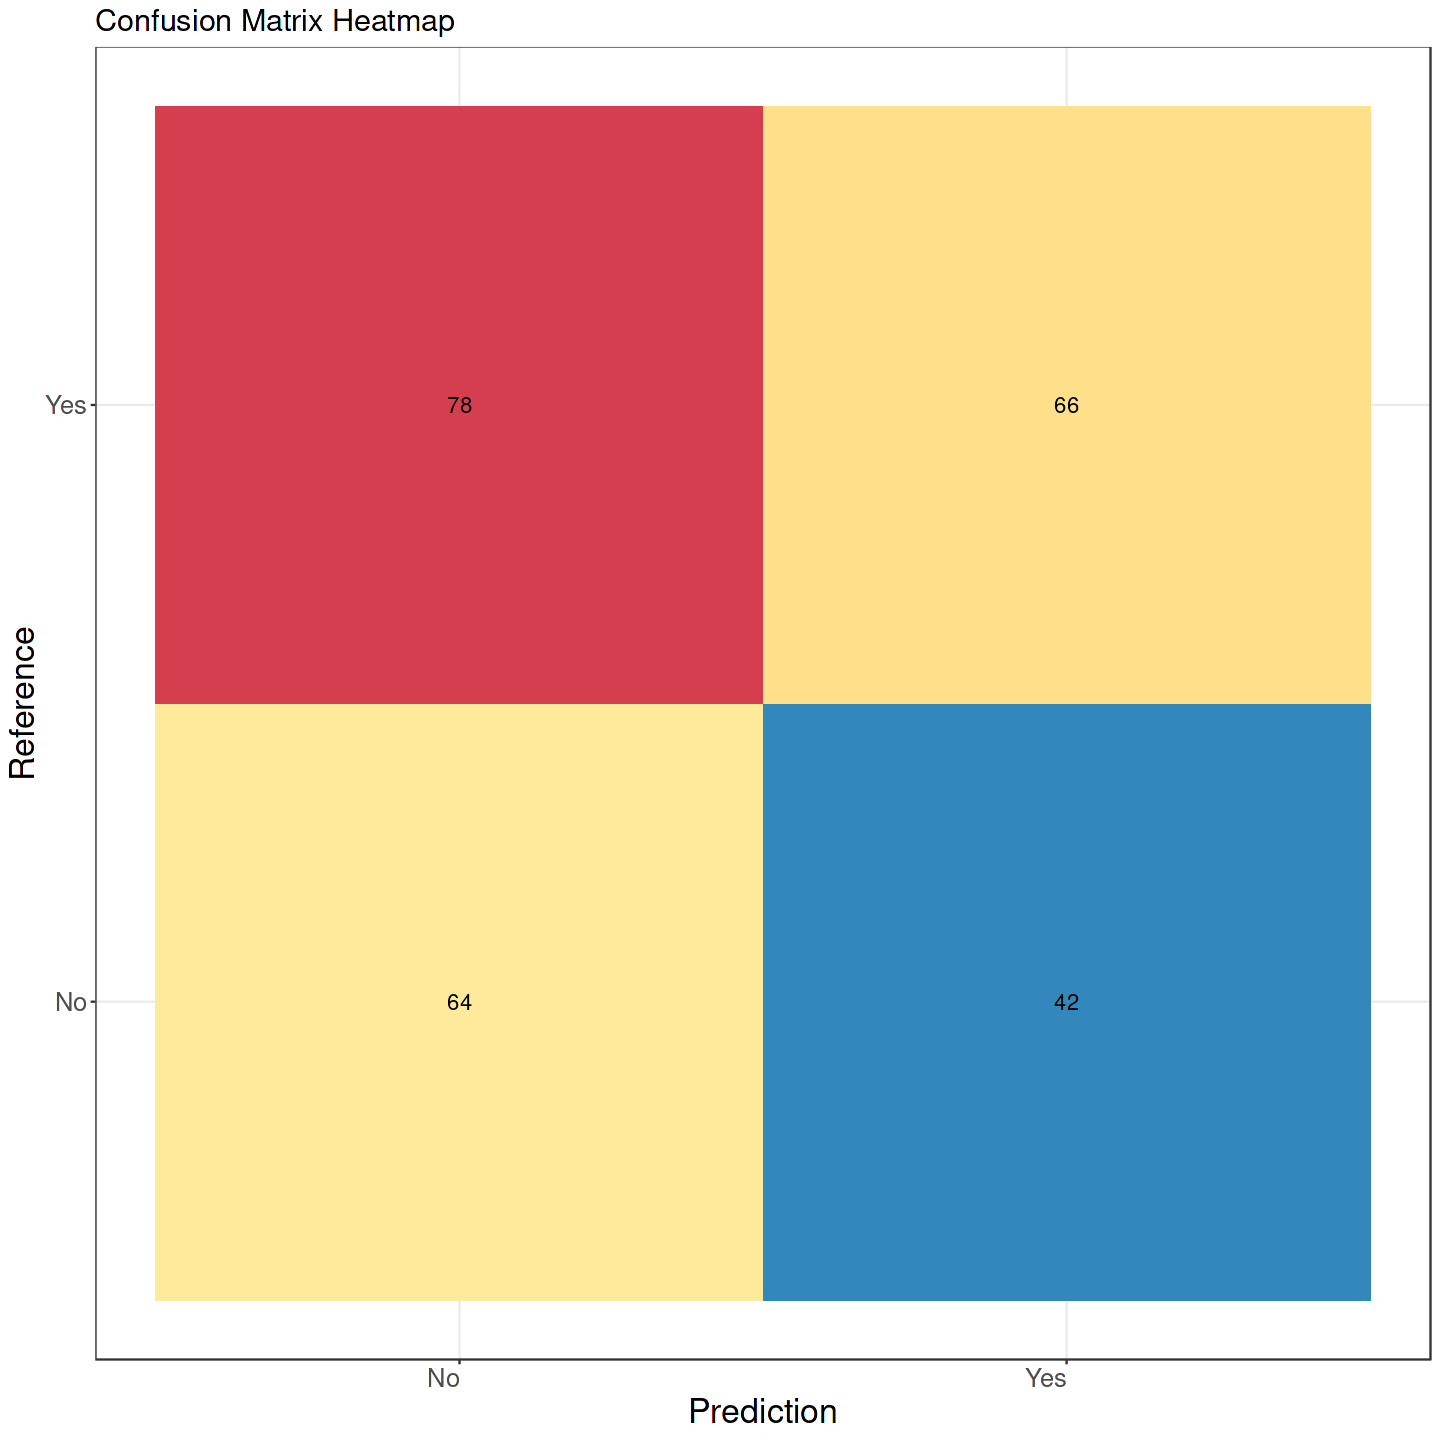

In [112]:
ggplot(mglm_) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 40), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 15, hjust=1),
                axis.text.y = element_text(size = 15, hjust=1),
                title = element_text(size=15)
                )

## **XGB & K-FOLD**

In [113]:
ctrl <- trainControl(method = "repeatedcv",
                     repeats = 5,
                     number = 5,
                     verboseIter = TRUE)

xgb <- train(Mental_Health_Condition ~ .,
                     data = train,
                     method = "xgbTree",
                     trControl = ctrl)

print(xgb)

+ Fold1.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=0.50, nrounds=150 
[10:56:56] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[10:56:56] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
- Fold1.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=0.50, nrounds=150 
+ Fold1.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=0.75, nrounds=150 
[10:56:56] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[10:56:56] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
- Fold1.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=0.75, nrounds=150 
+ Fold1.Rep1: eta=0.3, max_depth=1, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=1.00, nrounds=150 
[10:

In [114]:
pred_xgb <- predict(xgb, test)

In [115]:
xgb_cm <- confusionMatrix(pred_xgb, test$Mental_Health_Condition)

In [116]:
xgb_cm

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  51  79
       Yes 55  65
                                          
               Accuracy : 0.464           
                 95% CI : (0.4009, 0.5279)
    No Information Rate : 0.576           
    P-Value [Acc > NIR] : 0.99985         
                                          
                  Kappa : -0.0655         
                                          
 Mcnemar's Test P-Value : 0.04693         
                                          
            Sensitivity : 0.4811          
            Specificity : 0.4514          
         Pos Pred Value : 0.3923          
         Neg Pred Value : 0.5417          
             Prevalence : 0.4240          
         Detection Rate : 0.2040          
   Detection Prevalence : 0.5200          
      Balanced Accuracy : 0.4663          
                                          
       'Positive' Class : No              
                                 

In [117]:
xgb_ <- data.frame(xgb_cm$table)

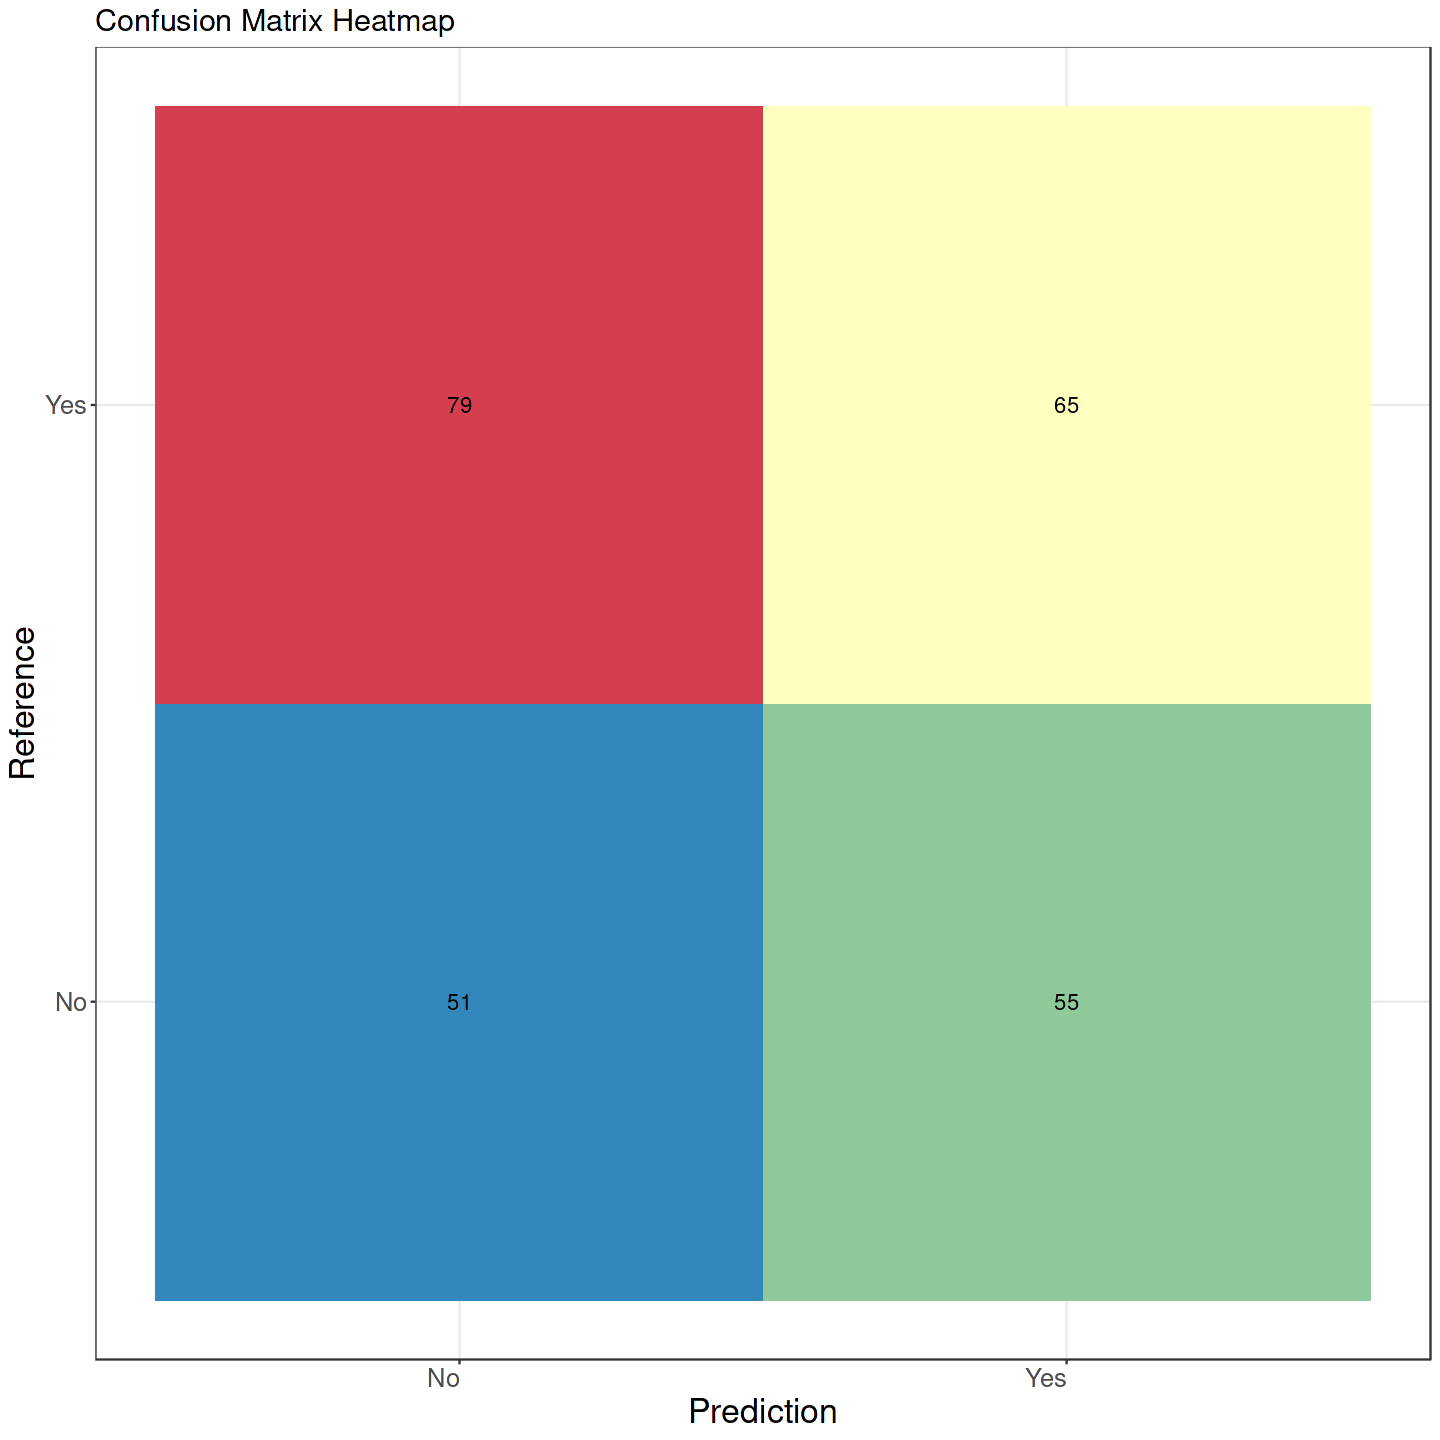

In [118]:
ggplot(xgb_) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 40), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 15, hjust=1),
                axis.text.y = element_text(size = 15, hjust=1),
                title = element_text(size=15)
                )

# **5. Evaluation**

In [119]:
acc <- data.frame(model = c('RF','DT','GLM','XGB') , Accuracy = c(rf_cm$overall[1], dtree_cm$overall[1], glm_cm$overall[1], xgb_cm$overall[1]))

In [120]:
acc

model,Accuracy
<chr>,<dbl>
RF,0.472
DT,0.460
GLM,0.520
XGB,0.464


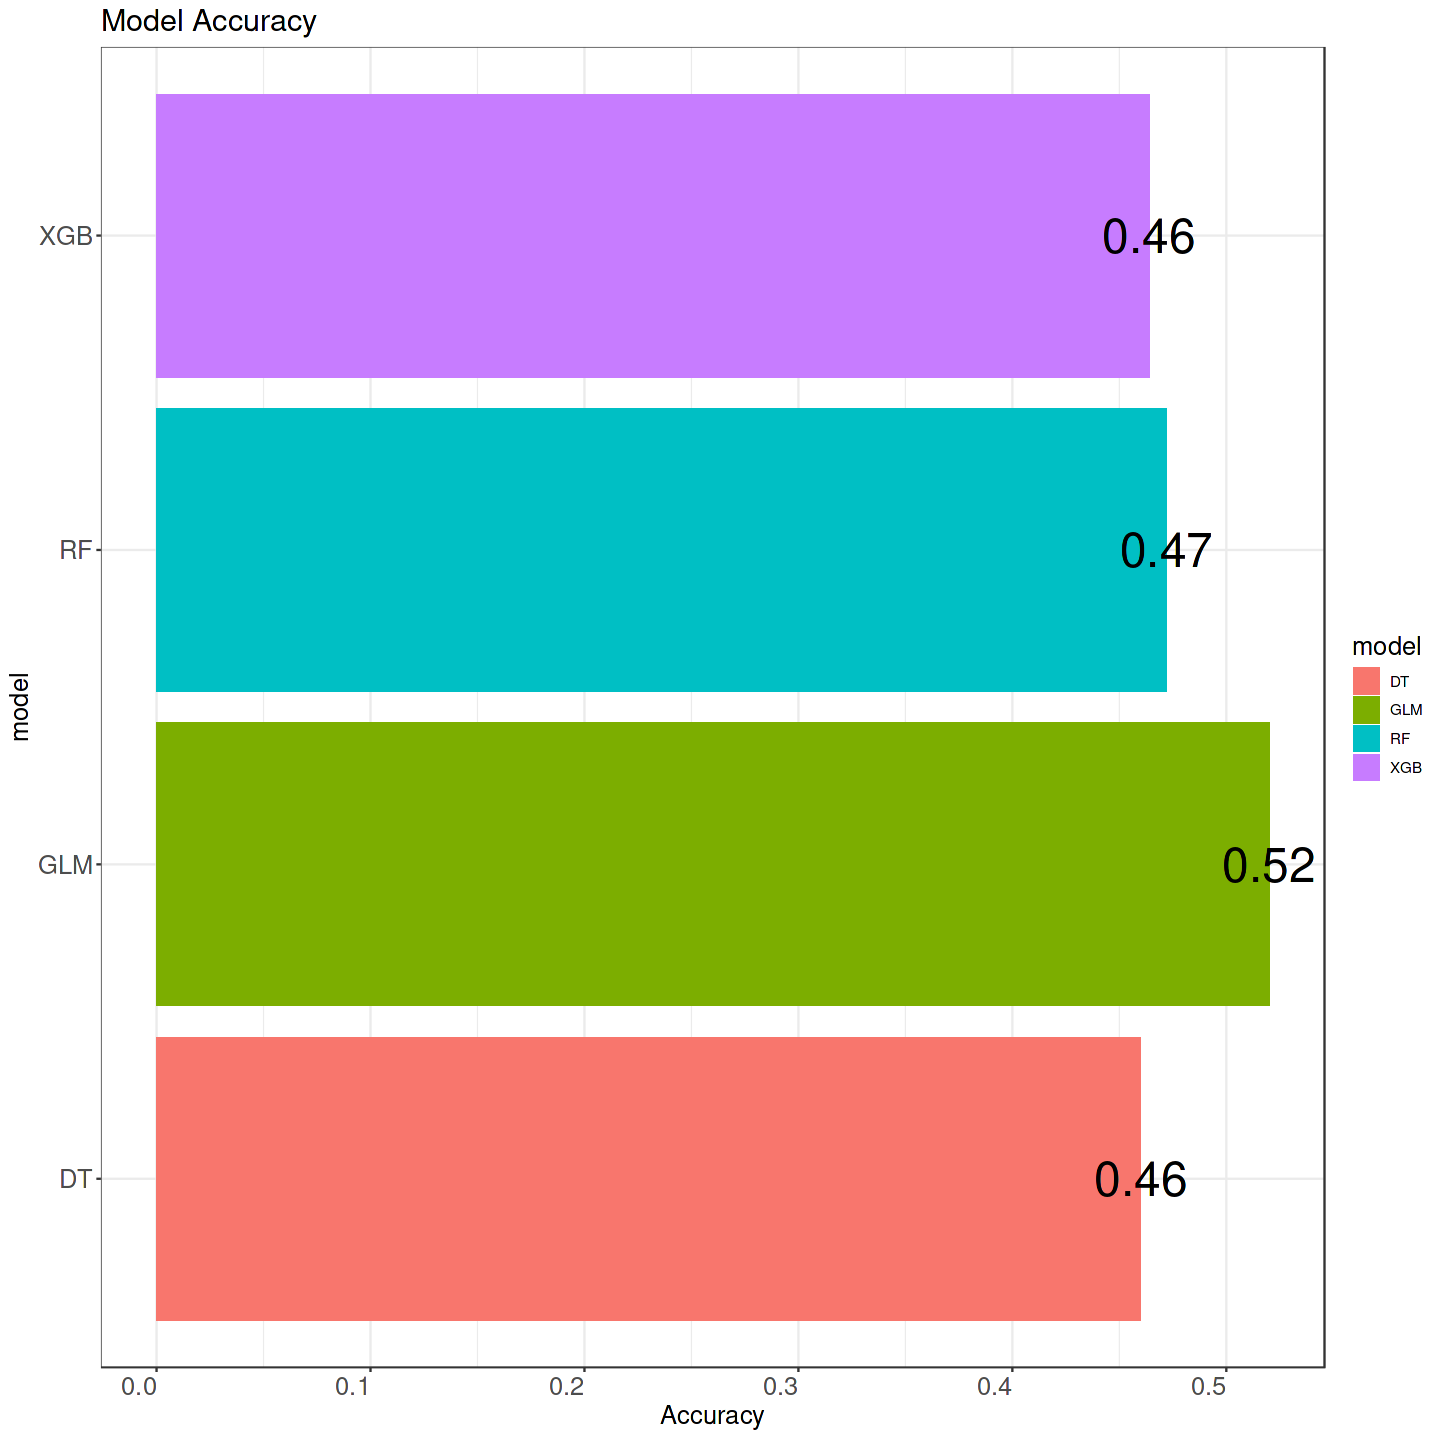

In [121]:
ggplot(acc) + geom_col(aes(y=model , x= Accuracy , fill = model)) +
    geom_text(aes(y = model , x= Accuracy, label= round(Accuracy,2)), hjust=0.5, size = 10) +
    theme_bw() +
    ggtitle('Model Accuracy') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

--------------------

**Thankyou. Please leave your advice in the comments**